### Loan Prediction Problem

#### Problem Statement

Predict Loan Eligibility for Dream Housing Finance company
Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban, semi urban and rural areas. Customer first applies for home loan and after that company validates the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have provided a dataset to identify the customers segments that are eligible for loan amount so that they can specifically target these customers. 

**Link**- https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

#### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve
import warnings
from sklearn.preprocessing import StandardScaler, RobustScaler
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')
%matplotlib inline

#### Import Data

In [2]:
train_df = pd.read_csv('train_ctrUa4K.csv')

test_df = pd.read_csv('test_lAUu6dG.csv')

sample_df = pd.read_csv('sample_submission_49d68Cx.csv')

In [3]:
train_df['Source'] = 'train'

test_df['Source'] = 'test'

In [4]:
df = pd.concat([train_df, test_df], axis = 0)

In [5]:
df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status Source  
0             1.0         Urban           Y  train  
1             1.0         Rural           N  train  
2             1.0         Urban           Y  train  
3             1.0         Urban           Y  train  
4             1.0         Urban           Y  train

#### EDA

In [386]:
#Getting the brief summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  Source             981 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 115.0+ KB


In [6]:
#no. of null values in the dataframe
df.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

In [18]:
df['Gender'].value_counts()

Male      775
Female    182
Name: Gender, dtype: int64

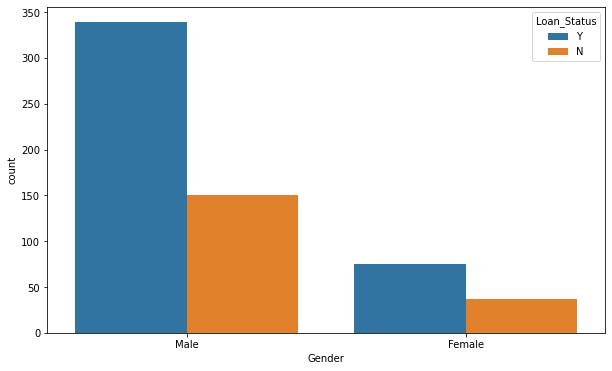

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Gender'], hue=df['Loan_Status']);

**observation** :  
* Looks like male customers are the most who eligible for the Loan

In [22]:
#Loan ID is unique for all customers. It's a Primary Key
df.Loan_ID.nunique()

981

In [24]:
df['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

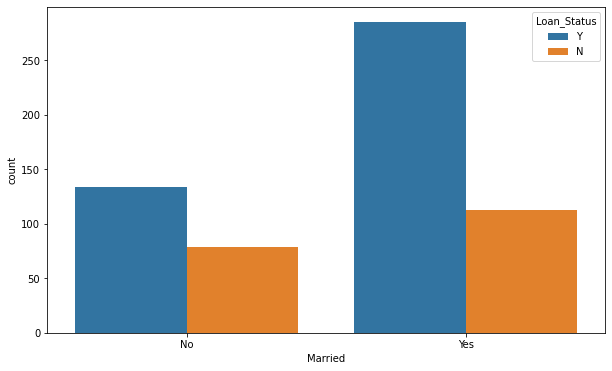

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Married'], hue=df['Loan_Status']);

**Observation** : 
* Married customers have the higher chance to get loan approval

In [27]:
df['Dependents'].value_counts()

0     545
1     160
2     160
3+     91
Name: Dependents, dtype: int64

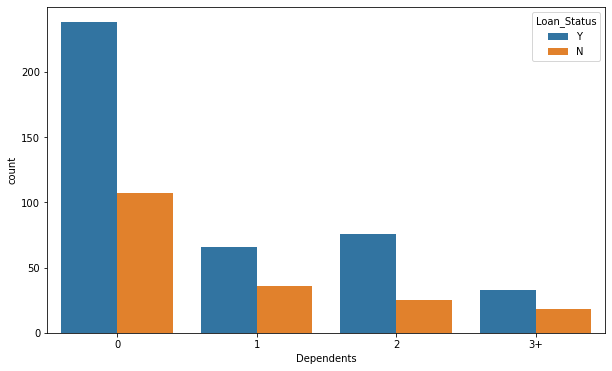

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Dependents'], hue=df['Loan_Status']);

**Observation** : 
* Customers with 0 dependant have the higher chance of getting loan approval. 
* Customers with more than 3 dependents have the lower chance of getting loan approval 

In [30]:
df['Education'].value_counts()

Graduate        763
Not Graduate    218
Name: Education, dtype: int64

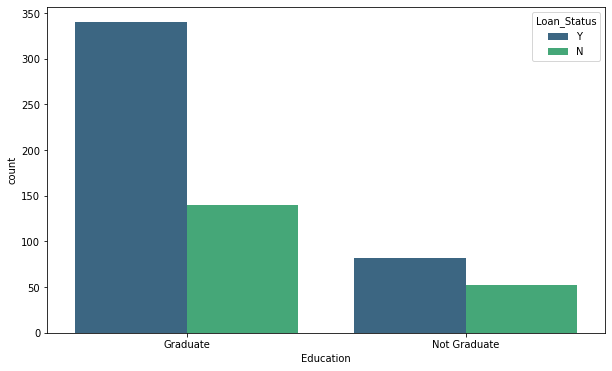

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Education'], hue=df['Loan_Status'], palette='viridis');

**Observation**:
* Graduate People have the higher chance of Loan approval

In [34]:
df['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

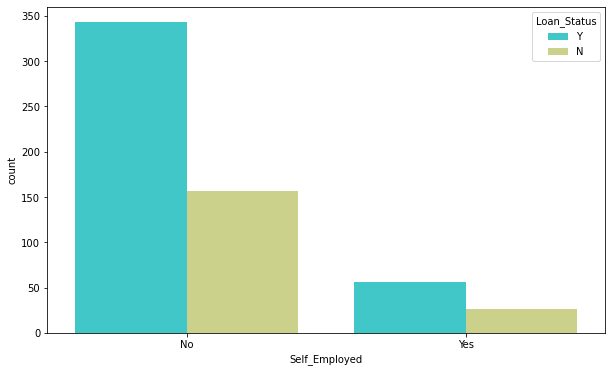

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Self_Employed'], hue=df['Loan_Status'], palette='rainbow');

**Observations**:
* Most of the people falls in Not Self Employed Category.
* Working people have the higher chance of Loan approval compared to Self employed.

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

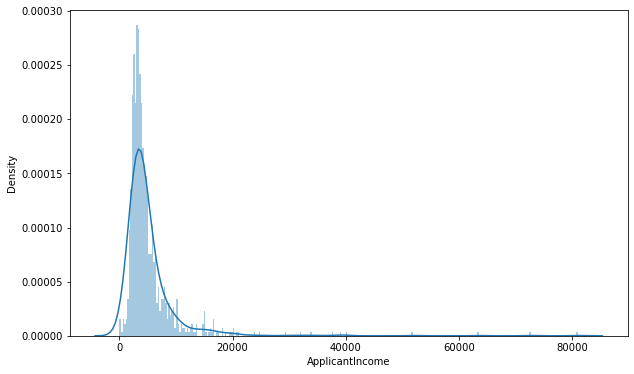

In [42]:
plt.figure(figsize=(10,6))
sns.distplot(df['ApplicantIncome'], bins = 300,)
#Applicant income follows the normal distribution

<AxesSubplot:xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

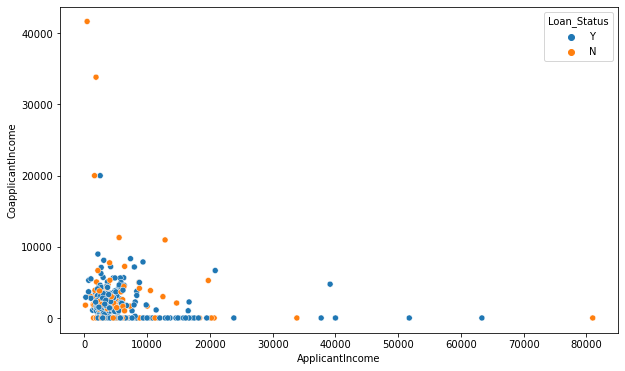

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = df['ApplicantIncome'], y = df['CoapplicantIncome'], hue=df['Loan_Status'])

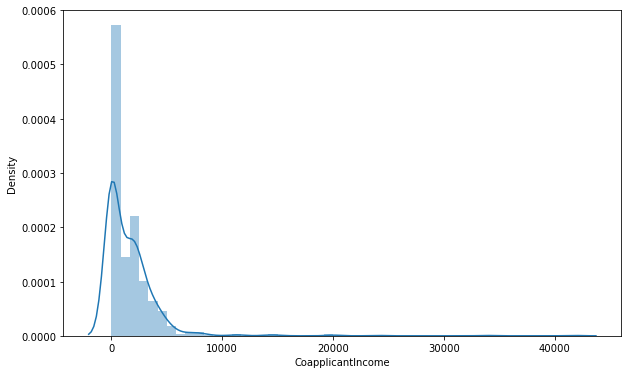

In [58]:
plt.figure(figsize=(10,6))
sns.distplot(df['CoapplicantIncome']);

**Observations**:
* Most of the applicant's co-applicant income have zero value
* More or less it's like left skewed distribution

In [50]:
df['CoapplicantIncome'].value_counts()

0.0       429
2500.0      6
2333.0      5
2083.0      5
2000.0      5
         ... 
3447.0      1
5105.0      1
7873.0      1
923.0       1
1700.0      1
Name: CoapplicantIncome, Length: 437, dtype: int64

In [104]:
df['LoanAmount'].value_counts()

120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
312.0     1
17.0      1
304.0     1
405.0     1
436.0     1
Name: LoanAmount, Length: 232, dtype: int64

<AxesSubplot:ylabel='Density'>

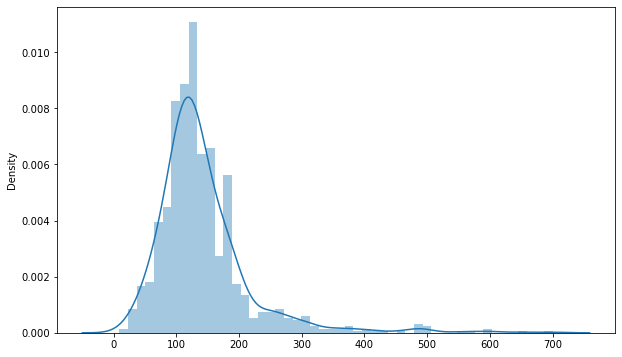

In [66]:
plt.figure(figsize=(10,6))
sns.distplot(x = df['LoanAmount'])
#Loan Amount is normally distributed

In [70]:
df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

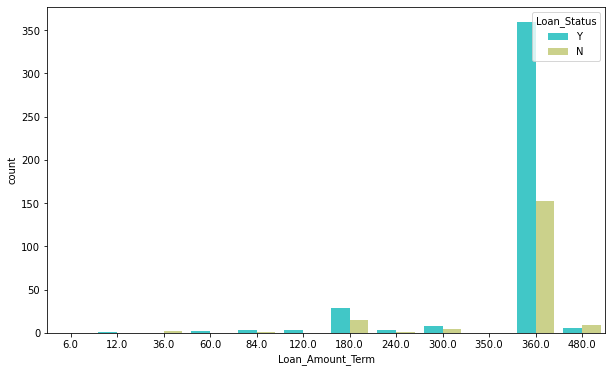

In [71]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Loan_Amount_Term'], hue=df['Loan_Status'], palette='rainbow');

**Observations**:
* Most of the Loan amount term is 360.0

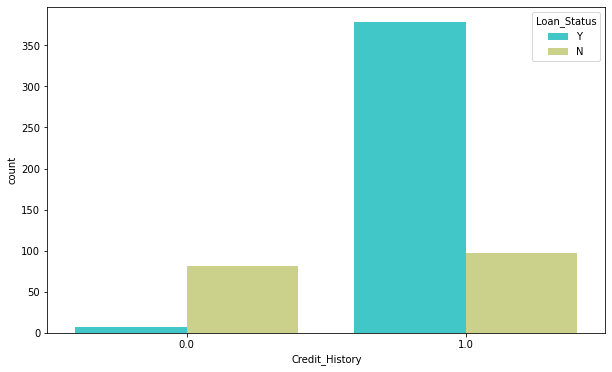

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Credit_History'], hue=df['Loan_Status'], palette='rainbow');

**Observations**
* Most of the applicant's meet the credit guidelines and it has higher chance to get loan approval

In [77]:
df['Property_Area'].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

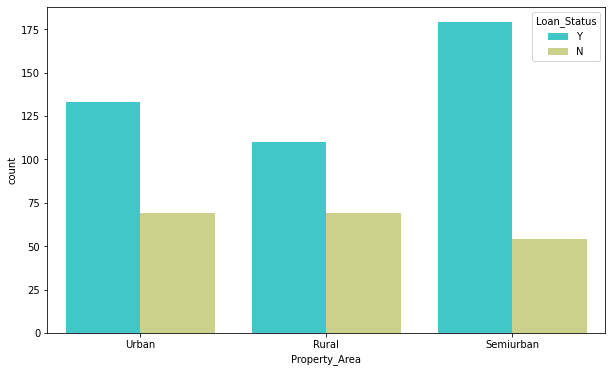

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(x = df['Property_Area'], hue=df['Loan_Status'], palette='rainbow');

**Observation:**
* Semi-Urban people have higher chance of getting loan approval compared to Urban and Rural people

### Feature Engineering

In [388]:
df.describe(include='all')

Loan_ID Gender Married Dependents Education Self_Employed  \
count        981    957     978        956       981           926   
unique       981      2       2          4         2             2   
top     LP002057   Male     Yes          0  Graduate            No   
freq           1    775     631        545       763           807   
mean         NaN    NaN     NaN        NaN       NaN           NaN   
std          NaN    NaN     NaN        NaN       NaN           NaN   
min          NaN    NaN     NaN        NaN       NaN           NaN   
25%          NaN    NaN     NaN        NaN       NaN           NaN   
50%          NaN    NaN     NaN        NaN       NaN           NaN   
75%          NaN    NaN     NaN        NaN       NaN           NaN   
max          NaN    NaN     NaN        NaN       NaN           NaN   

        ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count        981.000000         981.000000  954.000000        961.000000   
unique              NaN                NaN         NaN               NaN   
top                 NaN                NaN         NaN               NaN   
freq                NaN                NaN         NaN               NaN   
mean        5179.795107        1601.916330  142.511530        342.201873   
std         5695.104533        2718.772806   77.421743         65.100602   
min            0.000000           0.000000    9.000000          6.000000   
25%         2875.000000           0.000000  100.000000        360.000000   
50%         3800.000000        1110.000000  126.000000        360.000000   
75%         5516.000000        2365.000000  162.000000        360.000000   
max        81000.000000       41667.000000  700.000000        480.000000   

        Credit_History Property_Area Loan_Status Source  
count       902.000000           981         614    981  
unique             NaN             3           2      2  
top                NaN     Semiurban           Y  train  
freq               NaN           349         422    614  
mean          0.835920           NaN         NaN    NaN  
std           0.370553           NaN         NaN    NaN  
min           0.000000           NaN         NaN    NaN  
25%           1.000000           NaN         NaN    NaN  
50%           1.000000           NaN         NaN    NaN  
75%           1.000000           NaN         NaN    NaN  
max           1.000000           NaN         NaN    NaN

In [6]:
def impute_mode(col):
    df[col].fillna(df[col].mode()[0], inplace = True)

In [7]:
def impute_median(col):
    df[col].fillna(df[col].median(), inplace = True)

In [8]:
impute_mode('Gender')

In [9]:
impute_mode('Married')

In [10]:
impute_mode('Dependents')

In [11]:
impute_mode('Self_Employed')

In [12]:
impute_median('LoanAmount')

In [13]:
impute_mode('Loan_Amount_Term')

In [14]:
impute_mode('Credit_History')

In [15]:
df.isna().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
Source                 0
dtype: int64

#### Splliting

In [16]:
gender = pd.get_dummies(df['Gender'], drop_first=False, prefix='Gen')

married = pd.get_dummies(df['Married'], drop_first=False, prefix='Mar')

edu = pd.get_dummies(df['Education'], drop_first=False, prefix = 'Edu')

emp = pd.get_dummies(df['Self_Employed'], drop_first=False, prefix = 'Emp')

cre = pd.get_dummies(df['Credit_History'], drop_first=False, prefix = 'Cre')

loan = pd.get_dummies(df['Loan_Amount_Term'], drop_first=False, prefix = 'Loan')

area = pd.get_dummies(df['Property_Area'], drop_first=False, prefix = 'Area')

In [17]:
gender

Gen_Female  Gen_Male
0             0         1
1             0         1
2             0         1
3             0         1
4             0         1
..          ...       ...
362           0         1
363           0         1
364           0         1
365           0         1
366           0         1

[981 rows x 2 columns]

In [18]:
final_df = df.drop(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area'], axis = 1)

In [19]:
final_df['Dependents'].replace('3+','3', inplace=True)

In [20]:
final_df['Dependents'].value_counts()

0    570
1    160
2    160
3     91
Name: Dependents, dtype: int64

In [21]:
final_df = pd.concat([final_df,gender, married, edu, emp, cre, loan, area], axis = 1)

In [22]:
final_df.drop('Loan_ID',axis = 1, inplace =True)

In [23]:
train_split = final_df[final_df['Source']=='train']

test_split = final_df[final_df['Source'] == 'test']

In [24]:
X_train = train_split.drop(['Loan_Status', 'Source'], axis = 1)

y_train = train_split['Loan_Status']

X_test = test_split.drop(['Loan_Status', 'Source'], axis = 1)

y_test = test_split['Loan_Status']

#### Modelling

In [25]:
X_train['Dependents']=X_train.Dependents.astype(int)

In [26]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [27]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [28]:
confusion_matrix(y_train, train_pred)

array([[ 85, 107],
       [  8, 414]])

In [29]:
accuracy_score(y_train, train_pred)

0.8127035830618893

In [30]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           N       0.91      0.44      0.60       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



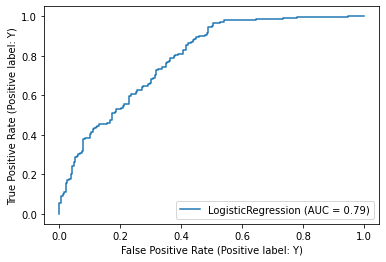

In [31]:
plot_roc_curve(lg,X_train, y_train)

In [32]:
sample_df['Loan_Status'] = test_pred

In [316]:
sample_df.to_csv('Logistics model_no_drop.csv', index = False)

#### Scaling

In [29]:
ro = RobustScaler()

In [27]:
depen = pd.get_dummies(final_df['Dependents'], drop_first=False, prefix = 'Dep')

In [319]:
#scaled = pd.DataFrame(ro.fit_transform(final_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [320]:
#Concatenating final df and scaled features

#final_df = pd.concat([final_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents'],axis = 1),scaled, depen], axis = 1)

In [32]:
final_df = pd.concat([final_df,depen],axis=1)
final_df.drop('Dependents',axis=1,inplace=True)

In [34]:
final_df

ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Status Source  \
0               5849                0.0       126.0           Y  train   
1               4583             1508.0       128.0           N  train   
2               3000                0.0        66.0           Y  train   
3               2583             2358.0       120.0           Y  train   
4               6000                0.0       141.0           Y  train   
..               ...                ...         ...         ...    ...   
362             4009             1777.0       113.0         NaN   test   
363             4158              709.0       115.0         NaN   test   
364             3250             1993.0       126.0         NaN   test   
365             5000             2393.0       158.0         NaN   test   
366             9200                0.0        98.0         NaN   test   

     Gen_Female  Gen_Male  Mar_No  Mar_Yes  Edu_Graduate  Edu_Not Graduate  \
0             0         1       1        0             1                 0   
1             0         1       0        1             1                 0   
2             0         1       0        1             1                 0   
3             0         1       0        1             0                 1   
4             0         1       1        0             1                 0   
..          ...       ...     ...      ...           ...               ...   
362           0         1       0        1             0                 1   
363           0         1       0        1             1                 0   
364           0         1       1        0             1                 0   
365           0         1       0        1             1                 0   
366           0         1       1        0             1                 0   

     Emp_No  Emp_Yes  Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  Loan_36.0  \
0         1        0        0        1         0          0          0   
1         1        0        0        1         0          0          0   
2         0        1        0        1         0          0          0   
3         1        0        0        1         0          0          0   
4         1        0        0        1         0          0          0   
..      ...      ...      ...      ...       ...        ...        ...   
362       0        1        0        1         0          0          0   
363       1        0        0        1         0          0          0   
364       1        0        0        1         0          0          0   
365       1        0        0        1         0          0          0   
366       0        1        0        1         0          0          0   

     Loan_60.0  Loan_84.0  Loan_120.0  Loan_180.0  Loan_240.0  Loan_300.0  \
0            0          0           0           0           0           0   
1            0          0           0           0           0           0   
2            0          0           0           0           0           0   
3            0          0           0           0           0           0   
4            0          0           0           0           0           0   
..         ...        ...         ...         ...         ...         ...   
362          0          0           0           0           0           0   
363          0          0           0           0           0           0   
364          0          0           0           0           0           0   
365          0          0           0           0           0           0   
366          0          0           0           1           0           0   

     Loan_350.0  Loan_360.0  Loan_480.0  Area_Rural  Area_Semiurban  \
0             0           1           0           0               0   
1             0           1           0           1               0   
2             0           1           0           0               0   
3             0           1           0           0               0   
4         

In [36]:
final_df1=pd.DataFrame(ro.fit_transform(final_df.drop(['Loan_Status','Source'],axis=1)),columns=final_df.drop(['Loan_Status','Source'],axis=1).columns)

In [322]:
#train_split = final_df[final_df['Source']=='train']

#test_split = final_df[final_df['Source'] == 'test']

In [45]:
X_train = final_df1.iloc[:-367]
y_train = final_df.iloc[:-367,3]
X_test = final_df1.iloc[-367:]

#X_train = train_split.drop(['Loan_Status', 'Source'], axis = 1)

y_train = train_split['Loan_Status']

X_test = test_split.drop(['Loan_Status', 'Source'], axis = 1)

y_test = test_split['Loan_Status']

In [46]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [47]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [326]:
confusion_matrix(y_train, train_pred)

array([[ 85, 107],
       [  9, 413]])

In [48]:
confusion_matrix(y_train, train_pred)

array([[ 85, 107],
       [  9, 413]])

In [327]:
accuracy_score(y_train, train_pred)

0.8110749185667753

In [328]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           N       0.90      0.44      0.59       192
           Y       0.79      0.98      0.88       422

    accuracy                           0.81       614
   macro avg       0.85      0.71      0.74       614
weighted avg       0.83      0.81      0.79       614



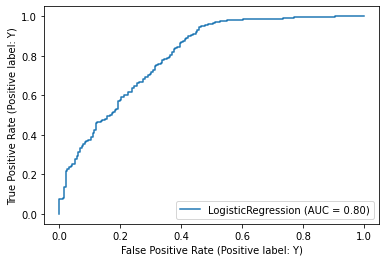

In [49]:
plot_roc_curve(lg, X_train, y_train);

In [215]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('Logistics model_1.csv', index = False)

#### Standard Scalar

In [414]:
sc = StandardScaler()

In [415]:
depen = pd.get_dummies(final_df['Dependents'], drop_first=False, prefix = 'Dep')


scaled = pd.DataFrame(sc.fit_transform(final_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [416]:
#Concatenating final df and scaled features

final_df = pd.concat([final_df.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Dependents'],axis = 1),scaled, depen], axis = 1)

In [417]:
final_df

Loan_Status Source  Gen_Female  Gen_Male  Mar_No  Mar_Yes  Edu_Graduate  \
0             Y  train           0         1       1        0             1   
1             N  train           0         1       0        1             1   
2             Y  train           0         1       0        1             1   
3             Y  train           0         1       0        1             0   
4             Y  train           0         1       1        0             1   
..          ...    ...         ...       ...     ...      ...           ...   
362         NaN   test           0         1       0        1             0   
363         NaN   test           0         1       0        1             1   
364         NaN   test           0         1       1        0             1   
365         NaN   test           0         1       0        1             1   
366         NaN   test           0         1       1        0             1   

     Edu_Not Graduate  Emp_No  Emp_Yes  Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  \
0                   0       1        0        0        1         0          0   
1                   0       1        0        0        1         0          0   
2                   0       0        1        0        1         0          0   
3                   1       1        0        0        1         0          0   
4                   0       1        0        0        1         0          0   
..                ...     ...      ...      ...      ...       ...        ...   
362                 1       0        1        0        1         0          0   
363                 0       1        0        0        1         0          0   
364                 0       1        0        0        1         0          0   
365                 0       1        0        0        1         0          0   
366                 0       0        1        0        1         0          0   

     Loan_36.0  Loan_60.0  Loan_84.0  Loan_120.0  Loan_180.0  Loan_240.0  \
0            0          0          0           0           0           0   
1            0          0          0           0           0           0   
2            0          0          0           0           0           0   
3            0          0          0           0           0           0   
4            0          0          0           0           0           0   
..         ...        ...        ...         ...         ...         ...   
362          0          0          0           0           0           0   
363          0          0          0           0           0           0   
364          0          0          0           0           0           0   
365          0          0          0           0           0           0   
366          0          0          0           0           1           0   

     Loan_300.0  Loan_350.0  Loan_360.0  Loan_480.0  Area_Rural  \
0             0           0           1           0           0   
1             0           0           1           0           1   
2             0           0           1           0           0   
3             0           0           1           0           0   
4             0           0           1           0           0   
..          ...         ...         ...         ...         ...   
362           0           0           1           0           0   
363           0           0           1           0           0   
364           0           0           1           0           0   
365           0           0           1           0           1   
366           0           0           0           0           1   

     Area_Semiurban  Area_Urban  ApplicantIncome  CoapplicantIncome  \
0                 0           1         0.117565          -0.589506   
1                 0           0        -0.104844          -0.034561   
2                 0           1        -0.382944          -0.589506   
3                 0           1        -0.456202           0.278239   
4        

In [418]:
train_split = final_df[final_df['Source']=='train']

test_split = final_df[final_df['Source'] == 'test']

In [419]:
X_train = train_split.drop(['Loan_Status', 'Source'], axis = 1)

y_train = train_split['Loan_Status']

X_test = test_split.drop(['Loan_Status', 'Source'], axis = 1)

y_test = test_split['Loan_Status']

In [420]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [421]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [422]:
confusion_matrix(y_train, train_pred)

array([[ 85, 107],
       [  9, 413]])

In [423]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('Logistics model_median.csv', index = False)

#### KNN

In [229]:
from sklearn.neighbors import KNeighborsClassifier

In [285]:
knn = KNeighborsClassifier(n_neighbors=30,n_jobs=-1)

In [286]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

In [287]:
train_pred_knn = knn.predict(X_train)

In [288]:
confusion_matrix(y_train, train_pred_knn)

array([[ 13, 179],
       [  0, 422]])

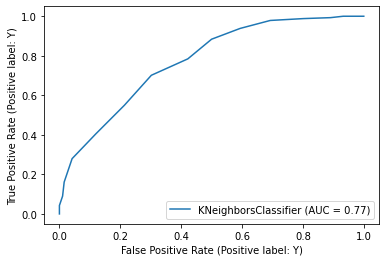

In [289]:
plot_roc_curve(knn, X_train, y_train);

In [290]:
test_pred_knn = knn.predict(X_test)

In [291]:
sample_df['Loan_Status'] = test_pred_knn

sample_df.to_csv('KNN model_7.csv', index = False)

In [240]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_train)
    error_rate.append(np.mean(pred_i != y_train))

Text(0, 0.5, 'Error Rate')

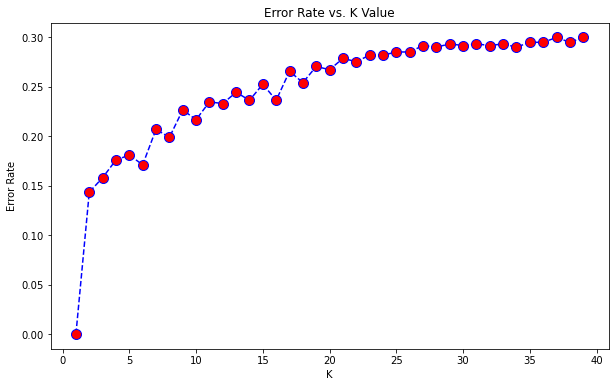

In [242]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#### Naive Bayes 

In [357]:
from sklearn.naive_bayes import GaussianNB

In [358]:
gb = GaussianNB()

In [359]:
X_train

Gen_Female  Gen_Male  Mar_No  Mar_Yes  Edu_Graduate  Edu_Not Graduate  \
0             0         1       1        0             1                 0   
1             0         1       0        1             1                 0   
2             0         1       0        1             1                 0   
3             0         1       0        1             0                 1   
4             0         1       1        0             1                 0   
..          ...       ...     ...      ...           ...               ...   
609           1         0       1        0             1                 0   
610           0         1       0        1             1                 0   
611           0         1       0        1             1                 0   
612           0         1       0        1             1                 0   
613           1         0       1        0             1                 0   

     Emp_No  Emp_Yes  Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  Loan_36.0  \
0         1        0        0        1         0          0          0   
1         1        0        0        1         0          0          0   
2         0        1        0        1         0          0          0   
3         1        0        0        1         0          0          0   
4         1        0        0        1         0          0          0   
..      ...      ...      ...      ...       ...        ...        ...   
609       1        0        0        1         0          0          0   
610       1        0        0        1         0          0          0   
611       1        0        0        1         0          0          0   
612       1        0        0        1         0          0          0   
613       0        1        1        0         0          0          0   

     Loan_60.0  Loan_84.0  Loan_120.0  Loan_180.0  Loan_240.0  Loan_300.0  \
0            0          0           0           0           0           0   
1            0          0           0           0           0           0   
2            0          0           0           0           0           0   
3            0          0           0           0           0           0   
4            0          0           0           0           0           0   
..         ...        ...         ...         ...         ...         ...   
609          0          0           0           0           0           0   
610          0          0           0           1           0           0   
611          0          0           0           0           0           0   
612          0          0           0           0           0           0   
613          0          0           0           0           0           0   

     Loan_350.0  Loan_360.0  Loan_480.0  Area_Rural  Area_Semiurban  \
0             0           1           0           0               0   
1             0           1           0           1               0   
2             0           1           0           0               0   
3             0           1           0           0               0   
4             0           1           0           0               0   
..          ...         ...         ...         ...             ...   
609           0           1           0           1               0   
610           0           0           0           1               0   
611           0           1           0           0               0   
612           0           1           0           0               0   
613           0           1           0           0               1   

     Area_Urban  ApplicantIncome  CoapplicantIncome  LoanAmount  Dep_0  Dep_1  \
0             1         0.117565          -0.589506   -0.286553      1      0   
1             0        -0.104844          -0.034561   -0.181837      0      1   
2             1        -0.382944          -0.589506   -0.993380      1      0   
3             1        -0.456202           0.278239   -0.286553      1      0

In [360]:
gb.fit(X_train, y_train)

GaussianNB()

In [368]:
train_pred_gb = gb.predict(X_train)

test_pred_gb = gb.predict(X_test)

In [369]:
confusion_matrix(y_train, train_pred_gb)

array([[190,   2],
       [410,  12]])

In [364]:
print(classification_report(y_train, train_pred_gb))

              precision    recall  f1-score   support

           N       0.32      0.99      0.48       192
           Y       0.86      0.03      0.06       422

    accuracy                           0.33       614
   macro avg       0.59      0.51      0.27       614
weighted avg       0.69      0.33      0.19       614



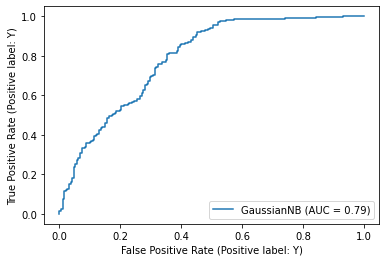

In [365]:
plot_roc_curve(gb, X_train, y_train)

In [370]:
sample_df['Loan_Status'] = test_pred_gb

sample_df.to_csv('NB model.csv', index = False)

In [424]:
final_df

Loan_Status Source  Gen_Female  Gen_Male  Mar_No  Mar_Yes  Edu_Graduate  \
0             Y  train           0         1       1        0             1   
1             N  train           0         1       0        1             1   
2             Y  train           0         1       0        1             1   
3             Y  train           0         1       0        1             0   
4             Y  train           0         1       1        0             1   
..          ...    ...         ...       ...     ...      ...           ...   
362         NaN   test           0         1       0        1             0   
363         NaN   test           0         1       0        1             1   
364         NaN   test           0         1       1        0             1   
365         NaN   test           0         1       0        1             1   
366         NaN   test           0         1       1        0             1   

     Edu_Not Graduate  Emp_No  Emp_Yes  Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  \
0                   0       1        0        0        1         0          0   
1                   0       1        0        0        1         0          0   
2                   0       0        1        0        1         0          0   
3                   1       1        0        0        1         0          0   
4                   0       1        0        0        1         0          0   
..                ...     ...      ...      ...      ...       ...        ...   
362                 1       0        1        0        1         0          0   
363                 0       1        0        0        1         0          0   
364                 0       1        0        0        1         0          0   
365                 0       1        0        0        1         0          0   
366                 0       0        1        0        1         0          0   

     Loan_36.0  Loan_60.0  Loan_84.0  Loan_120.0  Loan_180.0  Loan_240.0  \
0            0          0          0           0           0           0   
1            0          0          0           0           0           0   
2            0          0          0           0           0           0   
3            0          0          0           0           0           0   
4            0          0          0           0           0           0   
..         ...        ...        ...         ...         ...         ...   
362          0          0          0           0           0           0   
363          0          0          0           0           0           0   
364          0          0          0           0           0           0   
365          0          0          0           0           0           0   
366          0          0          0           0           1           0   

     Loan_300.0  Loan_350.0  Loan_360.0  Loan_480.0  Area_Rural  \
0             0           0           1           0           0   
1             0           0           1           0           1   
2             0           0           1           0           0   
3             0           0           1           0           0   
4             0           0           1           0           0   
..          ...         ...         ...         ...         ...   
362           0           0           1           0           0   
363           0           0           1           0           0   
364           0           0           1           0           0   
365           0           0           1           0           1   
366           0           0           0           0           1   

     Area_Semiurban  Area_Urban  ApplicantIncome  CoapplicantIncome  \
0                 0           1         0.117565          -0.589506   
1                 0           0        -0.104844          -0.034561   
2                 0           1        -0.382944          -0.589506   
3                 0           1        -0.456202           0.278239   
4        

#### Total Income

In [25]:
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [26]:
df['Debt_Income_Ratio'] = df['Total_Income']/df['LoanAmount']

In [27]:
gender = pd.get_dummies(df['Gender'], drop_first=False, prefix='Gen')

married = pd.get_dummies(df['Married'], drop_first=False, prefix='Mar')

edu = pd.get_dummies(df['Education'], drop_first=False, prefix = 'Edu')

emp = pd.get_dummies(df['Self_Employed'], drop_first=False, prefix = 'Emp')

cre = pd.get_dummies(df['Credit_History'], drop_first=False, prefix = 'Cre')

loan = pd.get_dummies(df['Loan_Amount_Term'], drop_first=False, prefix = 'Loan')

area = pd.get_dummies(df['Property_Area'], drop_first=False, prefix = 'Area')

depen = pd.get_dummies(df['Dependents'], drop_first=False, prefix = 'Dep')

In [28]:
df

Loan_ID Gender Married Dependents     Education Self_Employed  \
0    LP001002   Male      No          0      Graduate            No   
1    LP001003   Male     Yes          1      Graduate            No   
2    LP001005   Male     Yes          0      Graduate           Yes   
3    LP001006   Male     Yes          0  Not Graduate            No   
4    LP001008   Male      No          0      Graduate            No   
..        ...    ...     ...        ...           ...           ...   
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0       126.0             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
362             4009             1777.0       113.0             360.0   
363             4158              709.0       115.0             360.0   
364             3250             1993.0       126.0             360.0   
365             5000             2393.0       158.0             360.0   
366             9200                0.0        98.0             180.0   

     Credit_History Property_Area Loan_Status Source  Total_Income  \
0               1.0         Urban           Y  train        5849.0   
1               1.0         Rural           N  train        6091.0   
2               1.0         Urban           Y  train        3000.0   
3               1.0         Urban           Y  train        4941.0   
4               1.0         Urban           Y  train        6000.0   
..              ...           ...         ...    ...           ...   
362             1.0         Urban         NaN   test        5786.0   
363             1.0         Urban         NaN   test        4867.0   
364             1.0     Semiurban         NaN   test        5243.0   
365             1.0         Rural         NaN   test        7393.0   
366             1.0         Rural         NaN   test        9200.0   

     Debt_Income_Ratio  
0            46.420635  
1            47.585938  
2            45.454545  
3            41.175000  
4            42.553191  
..                 ...  
362          51.203540  
363          42.321739  
364          41.611111  
365          46.791139  
366          93.877551  

[981 rows x 16 columns]

In [29]:
final_df = df.drop(['Dependents','Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Loan_Amount_Term', 'Property_Area', 'ApplicantIncome', 'CoapplicantIncome', ], axis = 1)

In [30]:
sc = StandardScaler()

In [31]:
scaled = pd.DataFrame(sc.fit_transform(final_df[['Total_Income', 'Debt_Income_Ratio', 'LoanAmount']]), index=final_df.index, columns=['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'])

In [32]:
#Concatenating final df and scaled features

final_df = pd.concat([final_df.drop(['Total_Income', 'Debt_Income_Ratio', 'LoanAmount'],axis = 1),scaled,gender,married,edu,emp,cre,loan,area,depen], axis = 1)

In [33]:
final_df

Loan_ID Loan_Status Source  ApplicantIncome  CoapplicantIncome  \
0    LP001002           Y  train        -0.154913          -0.112887   
1    LP001003           N  train        -0.114719          -0.081600   
2    LP001005           Y  train        -0.628099          -0.138826   
3    LP001006           Y  train        -0.305721          -0.253728   
4    LP001008           Y  train        -0.129833          -0.216725   
..        ...         ...    ...              ...                ...   
362  LP002971         NaN   test        -0.165376           0.015529   
363  LP002975         NaN   test        -0.318012          -0.222939   
364  LP002980         NaN   test        -0.255562          -0.242019   
365  LP002986         NaN   test         0.101528          -0.102939   
366  LP002989         NaN   test         0.401650           1.161288   

     LoanAmount  Gen_Female  Gen_Male  Mar_No  Mar_Yes  Edu_Graduate  \
0     -0.210291           0         1       1        0             1   
1     -0.184098           0         1       0        1             1   
2     -0.996077           0         1       0        1             1   
3     -0.288869           0         1       0        1             0   
4     -0.013844           0         1       1        0             1   
..          ...         ...       ...     ...      ...           ...   
362   -0.380544           0         1       0        1             0   
363   -0.354351           0         1       0        1             1   
364   -0.210291           0         1       1        0             1   
365    0.208795           0         1       0        1             1   
366   -0.576991           0         1       1        0             1   

     Edu_Not Graduate  Emp_No  Emp_Yes  Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  \
0                   0       1        0        0        1         0          0   
1                   0       1        0        0        1         0          0   
2                   0       0        1        0        1         0          0   
3                   1       1        0        0        1         0          0   
4                   0       1        0        0        1         0          0   
..                ...     ...      ...      ...      ...       ...        ...   
362                 1       0        1        0        1         0          0   
363                 0       1        0        0        1         0          0   
364                 0       1        0        0        1         0          0   
365                 0       1        0        0        1         0          0   
366                 0       0        1        0        1         0          0   

     Loan_36.0  Loan_60.0  Loan_84.0  Loan_120.0  Loan_180.0  Loan_240.0  \
0            0          0          0           0           0           0   
1            0          0          0           0           0           0   
2            0          0          0           0           0           0   
3            0          0          0           0           0           0   
4            0          0          0           0           0           0   
..         ...        ...        ...         ...         ...         ...   
362          0          0          0           0           0           0   
363          0          0          0           0           0           0   
364          0          0          0           0           0           0   
365          0          0          0           0           0           0   
366          0          0          0           0           1           0   

     Loan_300.0  Loan_350.0  Loan_360.0  Loan_480.0  Area_Rural  \
0             0           0           1           0           0   
1             0           0           1           0           1   
2             0           0           1           0           0   
3             0           0           1           0           0   
4             0           0           1           0    

In [34]:
train_split = final_df[final_df['Source']=='train']

test_split = final_df[final_df['Source'] == 'test']

In [35]:
X_train = train_split.drop(['Loan_Status', 'Source', 'Loan_ID'], axis = 1)

y_train = train_split['Loan_Status']


X_test = test_split.drop(['Loan_Status', 'Source', 'Loan_ID'], axis = 1)

y_test = test_split['Loan_Status']

In [36]:
X_train

ApplicantIncome  CoapplicantIncome  LoanAmount  Gen_Female  Gen_Male  \
0          -0.154913          -0.112887   -0.210291           0         1   
1          -0.114719          -0.081600   -0.184098           0         1   
2          -0.628099          -0.138826   -0.996077           0         1   
3          -0.305721          -0.253728   -0.288869           0         1   
4          -0.129833          -0.216725   -0.013844           0         1   
..               ...                ...         ...         ...       ...   
609        -0.644708          -0.262586   -0.930595           1         0   
610        -0.444405           1.396820   -1.336584           0         1   
611         0.254164          -0.477146    1.452957           0         1   
612         0.133085          -0.270487    0.588592           0         1   
613        -0.365181          -0.434056   -0.118616           1         0   

     Mar_No  Mar_Yes  Edu_Graduate  Edu_Not Graduate  Emp_No  Emp_Yes  \
0         1        0             1                 0       1        0   
1         0        1             1                 0       1        0   
2         0        1             1                 0       0        1   
3         0        1             0                 1       1        0   
4         1        0             1                 0       1        0   
..      ...      ...           ...               ...     ...      ...   
609       1        0             1                 0       1        0   
610       0        1             1                 0       1        0   
611       0        1             1                 0       1        0   
612       0        1             1                 0       1        0   
613       1        0             1                 0       0        1   

     Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  Loan_36.0  Loan_60.0  Loan_84.0  \
0          0        1         0          0          0          0          0   
1          0        1         0          0          0          0          0   
2          0        1         0          0          0          0          0   
3          0        1         0          0          0          0          0   
4          0        1         0          0          0          0          0   
..       ...      ...       ...        ...        ...        ...        ...   
609        0        1         0          0          0          0          0   
610        0        1         0          0          0          0          0   
611        0        1         0          0          0          0          0   
612        0        1         0          0          0          0          0   
613        1        0         0          0          0          0          0   

     Loan_120.0  Loan_180.0  Loan_240.0  Loan_300.0  Loan_350.0  Loan_360.0  \
0             0           0           0           0           0           1   
1             0           0           0           0           0           1   
2             0           0           0           0           0           1   
3             0           0           0           0           0           1   
4             0           0           0           0           0           1   
..          ...         ...         ...         ...         ...         ...   
609           0           0           0           0           0           1   
610           0           1           0           0           0           0   
611           0           0           0           0           0           1   
612           0           0           0           0           0           1   
613           0           0           0           0           0           1   

     Loan_480.0  Area_Rural  Area_Semiurban  Area_Urban  Dep_0  Dep_1  Dep_2  \
0             0           0               0           1      1      0      0   
1             0           1               0           0      0      1      0   
2             0           0               0           1      1   

In [37]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [38]:
train_pred_ = lg.predict(X_train)

In [39]:
confusion_matrix(y_train,train_pred_)

array([[ 83, 109],
       [  9, 413]])

In [40]:
accuracy_score(y_train, train_pred_)

0.8078175895765473

In [472]:
test_pred = lg.predict(X_test)

In [475]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('lg model_re.csv', index = False)

In [477]:
test_pred.shape

(367,)

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
rf = RandomForestClassifier()

rf.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
rf.score(X_train, y_train)

1.0

In [45]:
test_pred_rf = rf.predict(X_test)

In [46]:
sample_df['Loan_Status'] = test_pred_rf

sample_df.to_csv('RF_model.csv', index = False)

#### Handling Imbalanced Data set

In [482]:
X

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Status  \
0            0             5849                0.0       120.0           Y   
1            1             4583             1508.0       128.0           N   
2            0             3000                0.0        66.0           Y   
3            0             2583             2358.0       120.0           Y   
4            0             6000                0.0       141.0           Y   
..         ...              ...                ...         ...         ...   
609          0             2900                0.0        71.0           Y   
610                        4106                0.0        40.0           Y   
611          1             8072              240.0       253.0           Y   
612          2             7583                0.0       187.0           Y   
613          0             4583                0.0       133.0           N   

    Source  Gen_Male  Mar_Yes  Edu_Not Graduate  Emp_Yes  Cre_1.0  Loan_12.0  \
0    train         1        0                 0        0        1          0   
1    train         1        1                 0        0        1          0   
2    train         1        1                 0        1        1          0   
3    train         1        1                 1        0        1          0   
4    train         1        0                 0        0        1          0   
..     ...       ...      ...               ...      ...      ...        ...   
609  train         0        0                 0        0        1          0   
610  train         1        1                 0        0        1          0   
611  train         1        1                 0        0        1          0   
612  train         1        1                 0        0        1          0   
613  train         0        0                 0        1        0          0   

     Loan_36.0  Loan_60.0  Loan_84.0  Loan_120.0  Loan_180.0  Loan_240.0  \
0            0          0          0           0           0           0   
1            0          0          0           0           0           0   
2            0          0          0           0           0           0   
3            0          0          0           0           0           0   
4            0          0          0           0           0           0   
..         ...        ...        ...         ...         ...         ...   
609          0          0          0           0           0           0   
610          0          0          0           0           1           0   
611          0          0          0           0           0           0   
612          0          0          0           0           0           0   
613          0          0          0           0           0           0   

     Loan_300.0  Loan_350.0  Loan_360.0  Loan_480.0  Area_Semiurban  \
0             0           0           1           0               0   
1             0           0           1           0               0   
2             0           0           1           0               0   
3             0           0           1           0               0   
4             0           0           1           0               0   
..          ...         ...         ...         ...             ...   
609           0           0           1           0               0   
610           0           0           0           0               0   
611           0           0           1           0               0   
612           0           0           1           0               0   
613           0           0           1           0               1   

     Area_Urban  
0             1  
1             0  
2             1  
3             1  
4             1  
..          ...  
609           0  
610           0  
611           1  
612           1  
613           0  

[614 rows x 24 columns]

In [487]:
from sklearn.model_selection import KFold, GridSearchCV

In [485]:
log_class = LogisticRegression()

grid = {'C':10.0**np.arange(-3,3), 'penalty' : ['l1', 'l2']}

cv = KFold(n_splits=5, shuffle=False, random_state=None)

In [488]:
clf = GridSearchCV(log_class, grid, cv = cv, n_jobs=-1,scoring='f1_macro')

clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [489]:
train_pred_imb = clf.predict(X_train)

In [490]:
confusion_matrix(y_train,train_pred_imb)

array([[ 87, 105],
       [  9, 413]])

In [491]:
test_pred = clf.predict(X_test)

In [492]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('lg model_imb.csv', index = False)

##### Under Sampling

In [494]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [495]:
ns = NearMiss(0.8)

In [497]:
X_train_ns, y_train_ns = ns.fit_resample(X_train,y_train)
print('Before',Counter(y_train))
print('After', Counter(y_train_ns))

Before Counter({'Y': 422, 'N': 192})
After Counter({'Y': 240, 'N': 192})


In [505]:
train_pred_imb1 = clf.predict(X_train_ns)

In [506]:
confusion_matrix(y_train_ns,train_pred_imb1)

array([[ 87, 105],
       [  4, 236]])

In [507]:
test_pred_imb1 = clf.predict(X_test)

In [508]:
sample_df['Loan_Status'] = test_pred_imb1

sample_df.to_csv('lg model_imb1.csv', index = False)

##### Over Sampling

In [509]:
from imblearn.over_sampling import RandomOverSampler

In [510]:
os =RandomOverSampler(0.75)

X_train_os, y_train_os = os.fit_resample(X_train, y_train)

print(f'The Number of class before the fit \n {Counter(y_train)}')

print(f'The Number of class after the fit \n {Counter(y_train_os)}')

The Number of class before the fit 
 Counter({'Y': 422, 'N': 192})
The Number of class after the fit 
 Counter({'Y': 422, 'N': 316})


In [535]:
X_train_os[X_train_os.duplicated()]

ApplicantIncome  CoapplicantIncome  LoanAmount  Gen_Female  Gen_Male  \
614        -0.484100           0.315365   -1.048463           1         0   
615        -0.721939          -0.487539   -0.878209           0         1   
616        -0.558674          -0.679460   -0.092423           1         0   
617        -0.365181          -0.260584   -0.393641           1         0   
618        -0.537249          -0.168817   -0.812727           0         1   
..               ...                ...         ...         ...       ...   
733        -0.206234          -0.417822    0.208795           0         1   
734        -0.341929           0.206295   -0.799630           1         0   
735        -0.203245          -0.616815    0.771942           0         1   
736        -0.436599          -0.372476   -0.380544           0         1   
737         0.354647           0.817246   -0.419834           0         1   

     Mar_No  Mar_Yes  Edu_Graduate  Edu_Not Graduate  Emp_No  Emp_Yes  \
614       1        0             0                 1       0        1   
615       1        0             1                 0       1        0   
616       1        0             1                 0       1        0   
617       0        1             1                 0       1        0   
618       1        0             1                 0       1        0   
..      ...      ...           ...               ...     ...      ...   
733       0        1             1                 0       1        0   
734       1        0             1                 0       1        0   
735       0        1             0                 1       1        0   
736       0        1             0                 1       1        0   
737       0        1             1                 0       1        0   

     Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  Loan_36.0  Loan_60.0  Loan_84.0  \
614        0        1         0          0          0          0          0   
615        0        1         0          0          0          0          0   
616        0        1         0          0          0          0          0   
617        0        1         0          0          0          0          0   
618        1        0         0          0          0          0          0   
..       ...      ...       ...        ...        ...        ...        ...   
733        1        0         0          0          0          0          0   
734        0        1         0          0          0          0          0   
735        1        0         0          0          0          0          0   
736        1        0         0          0          0          0          0   
737        1        0         0          0          0          0          0   

     Loan_120.0  Loan_180.0  Loan_240.0  Loan_300.0  Loan_350.0  Loan_360.0  \
614           0           0           0           0           0           1   
615           0           0           0           0           0           1   
616           0           0           0           0           0           1   
617           0           0           0           0           0           1   
618           0           0           0           0           0           1   
..          ...         ...         ...         ...         ...         ...   
733           0           0           0           0           0           1   
734           0           0           0           0           0           1   
735           0           0           0           0           0           1   
736           0           1           0           0           0           0   
737           0           0           0           0           0           1   

     Loan_480.0  Area_Rural  Area_Semiurban  Area_Urban  Dep_0  Dep_1  Dep_2  \
614           0           0               1           0      0      1      0   
615           0           0               0           1      1      0      0   
616           0           1               0           0      1   

In [518]:
train_pred_imb2 = lg.predict(X_train_os)

In [519]:
confusion_matrix(y_train_os,train_pred_imb2)

array([[132, 184],
       [  9, 413]])

In [516]:
test_pred_imb2 = lg.predict(X_test)

In [517]:
sample_df['Loan_Status'] = test_pred_imb2

sample_df.to_csv('lg model_new.csv', index = False)

##### SMOTE

In [47]:
from imblearn.combine import SMOTETomek

In [48]:
sm = SMOTETomek(0.5, n_jobs=-1)

In [49]:
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

print(f'The Number of class before the fit \n {y_train.value_counts()}')

print(f'The Number of class after the fit \n {y_train_sm.value_counts()}')

The Number of class before the fit 
 Y    422
N    192
Name: Loan_Status, dtype: int64
The Number of class after the fit 
 Y    386
N    175
Name: Loan_Status, dtype: int64


In [50]:
lg.fit(X_train_sm,y_train_sm)

LogisticRegression()

In [51]:
train_pred_sm = lg.predict(X_train_sm)

In [52]:
confusion_matrix(y_train_sm,train_pred_sm)

array([[ 97,  78],
       [  7, 379]])

In [53]:
print(classification_report(y_train_sm, train_pred_sm))

              precision    recall  f1-score   support

           N       0.93      0.55      0.70       175
           Y       0.83      0.98      0.90       386

    accuracy                           0.85       561
   macro avg       0.88      0.77      0.80       561
weighted avg       0.86      0.85      0.84       561



In [530]:
test_pred = lg.predict(X_test)

In [531]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('lg model_smote.csv', index = False)

### SMOTE RF

In [54]:
rf.fit(X_train_sm,y_train_sm)

RandomForestClassifier()

In [55]:
rf.score(X_train_sm,y_train_sm)

1.0

In [59]:
test_pred_smote = rf.predict(X_test)

In [60]:
sample_df['Loan_Status'] = test_pred_smote

sample_df.to_csv('rf model_smote.csv', index = False)

#### Imbalanced dataset

In [48]:
# Shuffle the Dataset.
shuffled_df = train_split.sample(frac=1,random_state=4)

# amount of fraud classes 192 rows.
fraud_df = shuffled_df.loc[shuffled_df['Loan_Status'] == 'N']

#Randomly select 492 observations.
non_fraud_df = shuffled_df.loc[shuffled_df['Loan_Status'] == 'Y'].sample(n=192,random_state=42)
normalized_df = pd.concat([fraud_df, non_fraud_df])

In [53]:
normalized_df['Loan_Status'].value_counts()

Y    192
N    192
Name: Loan_Status, dtype: int64

In [41]:
train_split

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount Loan_Status  \
0            0             5849                0.0       126.0           Y   
1            1             4583             1508.0       128.0           N   
2            0             3000                0.0        66.0           Y   
3            0             2583             2358.0       120.0           Y   
4            0             6000                0.0       141.0           Y   
..         ...              ...                ...         ...         ...   
609          0             2900                0.0        71.0           Y   
610          3             4106                0.0        40.0           Y   
611          1             8072              240.0       253.0           Y   
612          2             7583                0.0       187.0           Y   
613          0             4583                0.0       133.0           N   

    Source  Gen_Female  Gen_Male  Mar_No  Mar_Yes  Edu_Graduate  \
0    train           0         1       1        0             1   
1    train           0         1       0        1             1   
2    train           0         1       0        1             1   
3    train           0         1       0        1             0   
4    train           0         1       1        0             1   
..     ...         ...       ...     ...      ...           ...   
609  train           1         0       1        0             1   
610  train           0         1       0        1             1   
611  train           0         1       0        1             1   
612  train           0         1       0        1             1   
613  train           1         0       1        0             1   

     Edu_Not Graduate  Emp_No  Emp_Yes  Cre_0.0  Cre_1.0  Loan_6.0  Loan_12.0  \
0                   0       1        0        0        1         0          0   
1                   0       1        0        0        1         0          0   
2                   0       0        1        0        1         0          0   
3                   1       1        0        0        1         0          0   
4                   0       1        0        0        1         0          0   
..                ...     ...      ...      ...      ...       ...        ...   
609                 0       1        0        0        1         0          0   
610                 0       1        0        0        1         0          0   
611                 0       1        0        0        1         0          0   
612                 0       1        0        0        1         0          0   
613                 0       0        1        1        0         0          0   

     Loan_36.0  Loan_60.0  Loan_84.0  Loan_120.0  Loan_180.0  Loan_240.0  \
0            0          0          0           0           0           0   
1            0          0          0           0           0           0   
2            0          0          0           0           0           0   
3            0          0          0           0           0           0   
4            0          0          0           0           0           0   
..         ...        ...        ...         ...         ...         ...   
609          0          0          0           0           0           0   
610          0          0          0           0           1           0   
611          0          0          0           0           0           0   
612          0          0          0           0           0           0   
613          0          0          0           0           0           0   

     Loan_300.0  Loan_350.0  Loan_360.0  Loan_480.0  Area_Rural  \
0             0           0           1           0           0   
1             0           0           1           0           1   
2             0           0           1           0           0   
3             0           0           1           0           0   
4             0           0           1  

In [47]:
shuffled_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [58]:
X_train = normalized_df.drop(['Loan_Status', 'Source'], axis = 1)

y_train = normalized_df['Loan_Status']

X_test = test_split.drop(['Loan_Status', 'Source'], axis = 1)

y_test = test_split['Loan_Status']

In [59]:
lg = LogisticRegression()

lg.fit(X_train, y_train)

LogisticRegression()

In [60]:
train_pred = lg.predict(X_train)

test_pred = lg.predict(X_test)

In [61]:
confusion_matrix(y_train, train_pred)

array([[111,  81],
       [ 27, 165]])

In [62]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           N       0.80      0.58      0.67       192
           Y       0.67      0.86      0.75       192

    accuracy                           0.72       384
   macro avg       0.74      0.72      0.71       384
weighted avg       0.74      0.72      0.71       384



In [63]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('lg model_equal.csv', index = False)

#### XGBoost

In [129]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [64]:
params = {
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    'max_depth' : [3, 4, 5, 6, 8, 10, 12 ,15],
    'min_child_weight': [1, 3, 5, 7],
    'gamma' : [0.0,0.1,0.2,0.3,0.4], #less than 1 make sure
    'colsample_bytree':[0.3,0.4,0.5,0.7] #less than 1
}

In [149]:
xgb = XGBClassifier()

In [150]:
grid = GridSearchCV(xgb,params,verbose=3)

In [151]:
grid.fit(X_train,y_train_)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits
[17:49:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[17:49:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[17:49:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly s

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.3s
[17:49:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.2s
[17:49:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[17:49:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.2s
[17:49:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[17:49:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[17:49:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.3s
[17:49:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.2s
[17:49:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[17:49:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[17:49:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[17:49:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[17:49:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:49:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.2s
[17:49:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[17:49:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7; total time=   0.3s
[17:49:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[17:49:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[17:49:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.1s
[17:49:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.1s
[17:49:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:49:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[17:49:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[17:49:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[17:49:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[17:49:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[17:49:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[17:49:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.1s
[17:49:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:49:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:49:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.1s
[17:49:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[17:49:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[17:49:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' 

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[17:49:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[17:49:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[17:49:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[17:50:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[17:50:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[17:50:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:50:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:50:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:50:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[17:50:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[17:50:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[17:50:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:50:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[17:50:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.1s
[17:50:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[17:50:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.1s
[17:50:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.1s
[17:50:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[17:50:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[17:50:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[17:50:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.1s
[17:50:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.1s
[17:50:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[17:50:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[17:50:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[17:50:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[17:50:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[17:50:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[17:50:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[17:50:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=   0.1s
[17:50:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[17:50:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.2s
[17:50:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.1s
[17:50:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.1s
[17:50:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[17:50:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[17:50:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[17:50:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[17:50:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:50:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:50:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:50:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   0.1s
[17:50:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[17:50:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[17:50:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[17:50:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[17:50:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[17:50:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[17:50:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[17:50:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[17:50:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[17:50:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[17:50:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[17:50:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[17:50:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[17:50:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.2s
[17:50:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[17:50:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[17:50:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[17:50:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.1s
[17:50:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[17:50:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[17:50:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[17:50:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[17:50:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.1s
[17:50:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[17:50:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[17:50:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[17:50:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[17:51:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[17:51:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[17:51:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[17:51:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[17:51:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[17:51:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[17:51:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[17:51:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[17:51:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] E

[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[17:51:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[17:51:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[17:51:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.3s
[17:51:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.3s
[17:51:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.1s
[17:51:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[17:51:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.1s
[17:51:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.1s
[17:51:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[17:51:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[17:51:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[17:51:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[17:51:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[17:51:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[17:51:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[17:51:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.1s
[17:51:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.1s
[17:51:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[17:51:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[17:51:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[17:51:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.2s
[17:51:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.2s
[17:51:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.2s
[17:51:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[17:51:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[17:51:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3; total time=   0.1s
[17:51:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:51:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:51:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:51:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.2s
[17:51:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.1s
[17:51:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.1s
[17:51:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   0.1s
[17:51:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   0.1s
[17:51:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   0.1s
[17:51:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:51:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:51:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=1; total time=   0.1s
[17:51:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[17:51:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.1s
[17:51:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[17:51:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   0.1s
[17:51:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   0.1s
[17:51:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   0.1s
[17:51:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:51:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=5; total time=   0.1s
[17:51:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=5; total time=   0.1s
[17:51:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=7; total time=   0.1s
[17:51:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=7; total time=   0.1s
[17:51:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=7; total time=   0.1s
[17:51:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=7; total time=   0.1s
[17:51:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.1s
[17:51:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.1s
[17:51:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1; total time=   0.1s
[17:51:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=1; total time=   0.2s
[17:51:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.2s
[17:51:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   0.1s
[17:52:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   0.1s
[17:52:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   0.1s
[17:52:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   0.1s
[17:52:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   0.1s
[17:52:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   0.1s
[17:52:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=5; total time=   0.1s
[17:52:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=5; total time=   0.1s
[17:52:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[17:52:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   0.1s
[17:52:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   0.1s
[17:52:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[17:52:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[17:52:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.1s
[17:52:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.1s
[17:52:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] E

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.1s
[17:52:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.1s
[17:52:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.1s
[17:52:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.1s
[17:52:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.1s
[17:52:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[17:52:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   0.1s
[17:52:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   0.1s
[17:52:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   0.1s
[17:52:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[17:52:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[17:52:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[17:52:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5]

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.1s
[17:52:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[17:52:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[17:52:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[17:52:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[17:52:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[17:52:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[17:52:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[17:52:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[17:52:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.3s
[17:52:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.3s
[17:52:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[17:52:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=5; total time=   0.1s
[17:52:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[17:52:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[17:52:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[17:52:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[17:52:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[17:52:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.1s
[17:52:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.2s
[17:52:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.2s
[17:52:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.2s
[17:52:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.1s
[17:52:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.1s
[17:52:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[17:52:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[17:52:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[17:52:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] E

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[17:52:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[17:52:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[17:52:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[17:52:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[17:52:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[17:52:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.1s
[17:52:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.1s
[17:52:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.2s
[17:52:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.1s
[17:52:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.1s
[17:52:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.1s
[17:52:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:53:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.2s
[17:53:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.1s
[17:53:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5]

[CV 2/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.2s
[17:53:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.1s
[17:53:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.1s
[17:53:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:53:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.1s
[17:53:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.1s
[17:53:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[17:53:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   0.1s
[17:53:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   0.1s
[17:53:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.1s
[17:53:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.2s
[17:53:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.1s
[17:53:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.1s
[17:53:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.2s
[17:53:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.1s
[17:53:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   0.1s
[17:53:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   0.1s
[17:53:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   0.1s
[17:53:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.1s
[17:53:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=7; total time=   0.1s
[17:53:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=7; total time=   0.1s
[17:53:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[17:53:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=15, min_child_weight=7; total time=   0.1s
[17:53:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.1s
[17:53:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.1s
[17:53:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.1s
[17:53:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.1s
[17:53:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[17:53:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3; total time=   0.1s
[17:53:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=3; total time=   0.1s
[17:53:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.2s
[17:53:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.1s
[17:53:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.1s
[17:53:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   0.1s
[17:53:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   0.1s
[17:53:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   0.1s
[17:53:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.1s
[17:53:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.1s
[17:53:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.1s
[17:53:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:53:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.1s
[17:53:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.1s
[17:53:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5]

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[17:53:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[17:53:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[17:53:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.1s
[17:53:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.1s
[17:53:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.1s
[17:53:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:53:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.1s
[17:53:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.1s
[17:53:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5]

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.1s
[17:53:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.1s
[17:53:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.3s
[17:53:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:53:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.1s
[17:53:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.1s
[17:53:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5]

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7; total time=   0.1s
[17:53:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7; total time=   0.1s
[17:53:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7; total time=   0.1s
[17:53:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[17:53:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[17:53:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[17:53:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[17:54:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[17:54:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[17:54:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.1s
[17:54:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.1s
[17:54:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.1s
[17:54:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[17:54:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.1s
[17:54:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.1s
[17:54:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] E

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[17:54:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[17:54:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[17:54:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   0.1s
[17:54:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   0.1s
[17:54:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[17:54:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[17:54:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[17:54:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[17:54:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:54:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=7; total time=   0.1s
[17:54:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[17:54:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[17:54:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[17:54:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[17:54:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[17:54:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[17:54:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[17:54:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[17:54:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[17:54:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[17:54:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=5; total time=   0.1s
[17:54:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[17:54:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[17:54:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[17:54:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[17:54:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=1; total time=   0.1s
[17:54:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.1s
[17:54:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.2s
[17:54:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.1s
[17:54:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.1s
[17:54:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.1s
[17:54:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.1s
[17:54:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[17:54:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[17:54:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.1s
[17:54:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] E

[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[17:54:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[17:54:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[17:54:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[17:54:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[17:54:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[17:54:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.1s
[17:54:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.1s
[17:54:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.2s
[17:54:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.2s
[17:54:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.1s
[17:54:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.1s
[17:54:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.1s
[17:54:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.1s
[17:54:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=5; total time=   0.1s
[17:54:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:54:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.1s
[17:54:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.1s
[17:54:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5]

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.1s
[17:54:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.1s
[17:54:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.1s
[17:54:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[17:54:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[17:54:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   0.1s
[17:54:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.1s
[17:54:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.1s
[17:54:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.1s
[17:54:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.1s
[17:54:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.1s
[17:54:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.1s
[17:55:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   0.1s
[17:55:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   0.1s
[17:55:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   0.1s
[17:55:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.1s
[17:55:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.1s
[17:55:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.1s
[17:55:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[17:55:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7; total time=   0.1s
[17:55:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=7; total time=   0.1s
[17:55:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.1s
[17:55:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.1s
[17:55:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.1s
[17:55:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[17:55:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[17:55:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[17:55:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.1s
[17:55:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.1s
[17:55:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.1s
[17:55:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.1s
[17:55:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   0.1s
[17:55:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=5; total time=   0.1s
[17:55:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.1s
[17:55:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.1s
[17:55:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=7; total time=   0.1s
[17:55:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.1s
[17:55:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.1s
[17:55:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.1s
[17:55:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[17:55:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[17:55:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[17:55:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.1s
[17:55:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.1s
[17:55:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.1s
[17:55:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.1s
[17:55:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.1s
[17:55:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.1s
[17:55:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:55:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.1s
[17:55:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[17:55:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=7; total time=   0.1s
[17:55:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=7; total time=   0.1s
[17:55:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=7; total time=   0.1s
[17:55:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=7; total time=   0.1s
[17:55:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=   0.2s
[17:55:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=   0.1s
[17:55:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[17:55:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[17:55:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[17:55:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.1s
[17:55:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.1s
[17:55:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.1s
[17:55:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.1s
[17:55:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.1s
[17:55:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.1s
[17:55:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.1s
[17:55:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.1s
[17:55:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=   0.1s
[17:55:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[17:55:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[17:55:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[17:55:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   0.1s
[17:55:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   0.2s
[17:55:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   0.2s
[17:55:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   0.2s
[17:55:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=3; total time=   0.1s
[17:55:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=3; total time=   0.1s
[17:55:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   0.2s
[17:56:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   0.1s
[17:56:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   0.1s
[17:56:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=5; total time=   0.1s
[17:56:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=5; total time=   0.1s
[17:56:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=5; total time=   0.1s
[17:56:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=7; total time=   0.1s
[17:56:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=7; total time=   0.1s
[17:56:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=7; total time=   0.1s
[17:56:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[17:56:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[17:56:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[17:56:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1; total time=   0.1s
[17:56:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[17:56:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[17:56:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.1s
[17:56:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.1s
[17:56:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=3; total time=   0.1s
[17:56:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.1s
[17:56:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.1s
[17:56:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.2s
[17:56:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=5; total time=   0.1s
[17:56:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[17:56:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[17:56:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7; total time=   0.1s
[17:56:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=7; total time=   0.1s
[17:56:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[17:56:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.1s
[17:56:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.1s
[17:56:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.1s
[17:56:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[17:56:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[17:56:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[17:56:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   0.1s
[17:56:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   0.1s
[17:56:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[17:56:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[17:56:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   0.1s
[17:56:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   0.1s
[17:56:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5]

[CV 2/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[17:56:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[17:56:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[17:56:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=7; total time=   0.1s
[17:56:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[17:56:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[17:56:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:56:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[17:56:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[17:56:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5]

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[17:56:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[17:56:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[17:56:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.1s
[17:56:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.1s
[17:56:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[17:56:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[17:56:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[17:56:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[17:56:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:56:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[17:56:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[17:56:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[17:56:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[17:56:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.5s
[17:56:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.1s
[17:56:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:56:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:56:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[17:56:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[17:56:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[17:56:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[17:56:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[17:56:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[17:56:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] E

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.1s
[17:57:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:57:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:57:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.1s
[17:57:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.1s
[17:57:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.1s
[17:57:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[17:57:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[17:57:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[17:57:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1; total time=   0.2s
[17:57:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[17:57:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[17:57:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[17:57:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[17:57:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[17:57:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:57:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:57:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:57:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:57:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.1s
[17:57:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[17:57:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[17:57:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[17:57:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[17:57:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=8, min_child_weight=7; total time=   0.1s
[17:57:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[17:57:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.1s
[17:57:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logisti

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=   0.2s
[17:57:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=   0.2s
[17:57:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[17:57:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.1s
[17:57:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.1s
[17:57:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.1s
[17:57:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[17:57:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[17:57:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[17:57:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.1s
[17:57:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[17:57:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[17:57:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=   0.1s
[17:57:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=   0.1s
[17:57:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.2s
[17:57:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.2s
[17:57:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.1s
[17:57:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.1s
[17:57:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[17:57:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[17:57:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[17:57:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=3; total time=   0.1s
[17:57:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:57:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:57:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   0.1s
[17:57:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   0.1s
[17:57:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   0.1s
[17:57:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[17:57:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[17:57:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[17:57:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=7; total time=   0.1s
[17:57:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[17:57:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[17:57:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[17:57:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[17:57:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[17:57:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[17:57:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.2s
[17:57:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.2s
[17:57:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[17:57:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[17:57:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[17:57:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[17:57:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.1s
[17:57:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.1s
[17:57:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/

[17:58:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[17:58:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[17:58:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[17:58:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[17:58:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[17:58:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.2s
[17:58:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.1s
[17:58:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.2s
[17:58:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[17:58:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[17:58:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[17:58:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[17:58:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[17:58:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[17:58:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   0.1s
[17:58:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[17:58:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[17:58:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[17:58:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[17:58:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.3, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.2s
[17:58:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[17:58:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[17:58:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.1s
[17:58:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:58:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[17:58:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[17:58:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5]

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[17:58:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[17:58:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[17:58:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[17:58:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.1s
[17:58:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.1s
[17:58:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[17:58:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[17:58:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.2s
[17:58:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.2s
[17:58:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.2s
[17:58:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.2s
[17:58:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[17:58:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=3; total time=   0.2s
[17:58:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=3; total time=   0.2s
[17:58:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:58:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:58:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[17:58:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.1s
[17:58:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.1s
[17:58:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.1s
[17:58:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[17:58:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   0.1s
[17:58:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   0.1s
[17:58:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:58:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:58:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[17:58:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[17:58:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[17:58:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[17:58:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:58:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[17:58:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   0.2s
[17:58:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[17:58:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[17:58:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[17:58:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[17:58:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[17:58:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[17:58:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:59:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:59:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[17:59:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[17:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[17:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[17:59:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5]

[17:59:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[17:59:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[17:59:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[17:59:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[17:59:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[17:59:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[17:59:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[17:59:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[17:59:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.1s
[17:59:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[17:59:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[17:59:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[17:59:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[17:59:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[17:59:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[17:59:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[17:59:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.1s
[17:59:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[17:59:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[17:59:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[17:59:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[17:59:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[17:59:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[17:59:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[17:59:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.1s
[17:59:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.1s
[17:59:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:59:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:59:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[17:59:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[17:59:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[17:59:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[17:59:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[17:59:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[17:59:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[17:59:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[17:59:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[17:59:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=3; total time=   0.1s
[17:59:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[17:59:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[17:59:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[17:59:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.2s
[18:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.2s
[18:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.2s
[18:24:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.3s
[18:24:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.2s
[18:24:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.4s
[18:24:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:24:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:24:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:24:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[18:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[18:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.1s
[18:24:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:24:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:24:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:24:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:24:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:24:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:24:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:24:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:24:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[18:24:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:24:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:24:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:24:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.2s
[18:24:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:24:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:24:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:24:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.1s
[18:24:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.2s
[18:24:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:24:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:24:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:24:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5]

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[18:24:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:24:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:24:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:24:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:24:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:24:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:24:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.2s
[18:24:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:24:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5]

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[18:24:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:24:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:24:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:25:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.2s
[18:25:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[18:25:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.3s
[18:25:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[18:25:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[18:25:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.1s
[18:25:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.1s
[18:25:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:25:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[18:25:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[18:25:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[18:25:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:25:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:25:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:25:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:25:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[18:25:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[18:25:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] E

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.1s
[18:25:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.1s
[18:25:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:25:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' w

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[18:25:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[18:25:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[18:25:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=1; total time=   0.2s
[18:25:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[18:25:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:25:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:25:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:25:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:25:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:25:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:25:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:25:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.1s
[18:25:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:25:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:25:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.2s
[18:25:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[18:25:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.1s
[18:25:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:25:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:25:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:25:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:25:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[18:25:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[18:25:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:25:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:25:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:25:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:25:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:25:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[18:25:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[18:25:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[18:25:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[18:25:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.4s
[18:25:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.3s
[18:25:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   1.0s
[18:25:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.1s
[18:26:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[18:26:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.3s
[18:26:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.4s
[18:26:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.4s
[18:26:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[18:26:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[18:26:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.3s
[18:26:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.2s
[18:26:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.3s
[18:26:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.3s
[18:26:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.2s
[18:26:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[18:26:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[18:26:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[18:26:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.2s
[18:26:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.2s
[18:26:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.2s
[18:26:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[18:26:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[18:26:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[18:26:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[18:26:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.2s
[18:26:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[18:26:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:26:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:26:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.2s
[18:26:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:26:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:26:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:26:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[18:26:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[18:26:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.1s
[18:26:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:26:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.2s
[18:26:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:26:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:26:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:26:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:26:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:26:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[18:26:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[18:26:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.2s
[18:26:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:26:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.1s
[18:26:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:27:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:27:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:27:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:27:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:27:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.2s
[18:27:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:27:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:27:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:27:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:27:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:27:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:27:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:27:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[18:27:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[18:27:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:27:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:27:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.1s
[18:27:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.5s
[18:27:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:27:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.4s
[18:27:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.3s
[18:27:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.6s
[18:27:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.6s
[18:27:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.6s
[18:27:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.4s
[18:27:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.6s
[18:27:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.4s
[18:27:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.2s
[18:27:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.2s
[18:27:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[18:27:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[18:27:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.3s
[18:27:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:27:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.6s
[18:27:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.2s
[18:27:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[18:27:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[18:27:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.6s
[18:27:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:28:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:28:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:28:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.5s
[18:28:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.3s
[18:28:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   0.4s
[18:28:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.6s
[18:28:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.8s
[18:28:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.3s
[18:28:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:28:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:28:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:28:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:28:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:28:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=7; total time=   0.1s
[18:28:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:28:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:28:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=6, min_child_weight=1; total time=   0.1s
[18:28:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:28:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:28:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:28:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.3s
[18:28:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=3; total time=   0.1s
[18:28:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=3; total time=   0.1s
[18:28:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[18:28:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:28:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=5; total time=   0.2s
[18:28:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:28:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:28:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.2s
[18:28:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[18:28:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[18:28:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[18:28:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.2s
[18:28:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.1s
[18:28:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.1s
[18:28:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[18:28:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.1s
[18:28:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.1s
[18:28:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[18:28:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.2s
[18:28:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.2s
[18:28:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.2s
[18:28:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.1s
[18:28:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.1s
[18:28:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[18:29:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=7; total time=   0.2s
[18:29:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=7; total time=   0.1s
[18:29:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[18:29:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[18:29:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[18:29:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[18:29:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.2s
[18:29:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[18:29:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=3; total time=   0.1s
[18:29:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=3; total time=   0.2s
[18:29:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=3; total time=   0.1s
[18:29:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:29:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=5; total time=   0.1s
[18:29:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=5; total time=   0.1s
[18:29:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.1s
[18:29:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.1s
[18:29:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[18:29:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7; total time=   0.1s
[18:29:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7; total time=   0.1s
[18:29:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7; total time=   0.1s
[18:29:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.3s
[18:29:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.2s
[18:29:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.2s
[18:29:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.1s
[18:29:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[18:29:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[18:29:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=3; total time=   0.1s
[18:29:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:29:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:29:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.1s
[18:29:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.1s
[18:29:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.1s
[18:29:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.2s
[18:29:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.1s
[18:29:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.1s
[18:29:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.1s
[18:29:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=7; total time=   0.1s
[18:29:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.2s
[18:29:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' w

[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1; total time=   0.2s
[18:29:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1; total time=   0.2s
[18:29:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=1; total time=   0.2s
[18:29:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.1s
[18:29:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.2s
[18:29:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.2, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.2s
[18:29:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=3; total time=   0.1s
[18:29:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:29:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:29:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.1s
[18:29:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[18:29:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[18:29:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   0.2s
[18:29:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   0.1s
[18:29:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   0.1s
[18:29:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:29:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   0.2s
[18:29:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   0.2s
[18:29:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5]

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.2s
[18:30:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.2s
[18:30:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.3s
[18:30:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=3; total time=   0.2s
[18:30:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=3; total time=   0.1s
[18:30:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=3; total time=   0.2s
[18:30:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[18:30:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5; total time=   0.2s
[18:30:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=5; total time=   0.2s
[18:30:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=5; total time=   0.1s
[18:30:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.1s
[18:30:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.1s
[18:30:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=7; total time=   0.1s
[18:30:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=7; total time=   0.1s
[18:30:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=7; total time=   0.1s
[18:30:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.2s
[18:30:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.2s
[18:30:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.2s
[18:30:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=1; total time=   0.2s
[18:30:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.2s
[18:30:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.2s
[18:30:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   0.2s
[18:30:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   0.1s
[18:30:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.2s
[18:30:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=5; total time=   0.2s
[18:30:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=5; total time=   0.1s
[18:30:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=5; total time=   0.1s
[18:30:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=7; total time=   0.1s
[18:30:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=7; total time=   0.1s
[18:30:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=7; total time=   0.1s
[18:30:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.1s
[18:30:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.1s
[18:30:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.1s
[18:30:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.1s
[18:30:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.1s
[18:30:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.1s
[18:30:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.2s
[18:30:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.1s
[18:30:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.1s
[18:30:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.1s
[18:30:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.1s
[18:30:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.1s
[18:30:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[18:30:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[18:30:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[18:30:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[18:30:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[18:30:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[18:30:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.1s
[18:30:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.1s
[18:30:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.1s
[18:30:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.1s
[18:30:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.1s
[18:30:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.1s
[18:30:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.2s
[18:31:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[18:31:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[18:31:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.2s
[18:31:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[18:31:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[18:31:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[18:31:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   0.2s
[18:31:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   0.2s
[18:31:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[18:31:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[18:31:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[18:31:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[18:31:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[18:31:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[18:31:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[18:31:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[18:31:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=5; total time=   0.1s
[18:31:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[18:31:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.2s
[18:31:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[18:31:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:31:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[18:31:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[18:31:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[18:31:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[18:31:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=1; total time=   0.2s
[18:31:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[18:31:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.2s
[18:31:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.2s
[18:31:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.5s
[18:31:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.5s
[18:31:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.1s
[18:31:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.2s
[18:31:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[18:31:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[18:31:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:31:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:31:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:31:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.1s
[18:31:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=5; total time=   0.1s
[18:31:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[18:31:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.1s
[18:31:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.1s
[18:31:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.1s
[18:31:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.2s
[18:31:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.2s
[18:31:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.2s
[18:31:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=1; total time=   0.2s
[18:31:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.1s
[18:31:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.1s
[18:31:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.2s
[18:31:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.1s
[18:31:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.1s
[18:31:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:31:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:31:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:31:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.1s
[18:31:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[18:31:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[18:31:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   0.1s
[18:32:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   0.1s
[18:32:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.1s
[18:32:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   0.3s
[18:32:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   0.2s
[18:32:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   0.2s
[18:32:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   0.2s
[18:32:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   0.1s
[18:32:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   0.1s
[18:32:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=3; total time=   0.2s
[18:32:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.2s
[18:32:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.2s
[18:32:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=5; total time=   0.2s
[18:32:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=5; total time=   0.1s
[18:32:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=5; total time=   0.1s
[18:32:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.2s
[18:32:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.1s
[18:32:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.1s
[18:32:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.2s
[18:32:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[18:32:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[18:32:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.2s
[18:32:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.1s
[18:32:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.1s
[18:32:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.2s
[18:32:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.1s
[18:32:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.1s
[18:32:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.2s
[18:32:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.1s
[18:32:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.2s
[18:32:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=5; total time=   0.1s
[18:32:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.1s
[18:32:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.1s
[18:32:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=7; total time=   0.2s
[18:32:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[18:32:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=1; total time=   0.1s
[18:32:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.2s
[18:32:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.1s
[18:32:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=3; total time=   0.1s
[18:32:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.1s
[18:32:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.1s
[18:32:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=3; total time=   0.1s
[18:32:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.1s
[18:32:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.1s
[18:32:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=5; total time=   0.1s
[18:32:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.2s
[18:32:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.1s
[18:32:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=8, min_child_weight=7; total time=   0.1s
[18:32:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=7; total time=   0.2s
[18:32:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=7; total time=   0.1s
[18:32:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=7; total time=   0.2s
[18:32:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[18:33:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[18:33:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[18:33:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.1s
[18:33:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.2s
[18:33:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.3s
[18:33:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:33:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.2s
[18:33:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.1s
[18:33:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] E

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.4s
[18:33:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.3s
[18:33:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.3s
[18:33:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.2s
[18:33:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[18:33:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[18:33:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:33:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[18:33:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[18:33:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] E

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   0.2s
[18:33:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   1.1s
[18:33:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   0.7s
[18:33:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.4s
[18:33:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.3s
[18:33:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   0.2s
[18:33:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.2s
[18:33:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.2s
[18:33:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.2s
[18:33:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=5; total time=   0.2s
[18:33:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=5; total time=   0.2s
[18:33:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=5; total time=   0.1s
[18:33:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[18:33:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[18:33:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[18:33:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.2s
[18:33:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[18:33:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=1; total time=   0.1s
[18:33:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1; total time=   0.2s
[18:33:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1; total time=   0.2s
[18:34:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1; total time=   0.2s
[18:34:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3; total time=   0.1s
[18:34:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3; total time=   0.1s
[18:34:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=3; total time=   0.1s
[18:34:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=5; total time=   0.1s
[18:34:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=5; total time=   0.1s
[18:34:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=5; total time=   0.1s
[18:34:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=7; total time=   0.1s
[18:34:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=7; total time=   0.1s
[18:34:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=7; total time=   0.1s
[18:34:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=7; total time=   0.1s
[18:34:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.1s
[18:34:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.1s
[18:34:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.2s
[18:34:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.1s
[18:34:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.1s
[18:34:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   0.1s
[18:34:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   0.2s
[18:34:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=3; total time=   0.2s
[18:34:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   0.1s
[18:34:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   0.1s
[18:34:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   0.2s
[18:34:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=5; total time=   0.1s
[18:34:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:34:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:34:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=7; total time=   0.1s
[18:34:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.4, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=7; total time=   0.1s
[18:34:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:34:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.2s
[18:34:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[18:34:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[18:34:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:34:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.2s
[18:34:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:34:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5]

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:34:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:34:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:34:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[18:34:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:34:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:34:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[18:34:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[18:34:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.3s
[18:34:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.4s
[18:34:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.5s
[18:34:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[18:34:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:34:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:34:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:34:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[18:34:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.2s
[18:34:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.2s
[18:34:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:34:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:34:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:34:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[18:34:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.1s
[18:34:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.2s
[18:34:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:35:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:35:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:35:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:35:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.3s
[18:35:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=12, min_child_weight=3; total time=   0.2s
[18:35:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:35:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.1s
[18:35:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:35:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:35:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:35:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:35:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:35:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:35:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=4, min_child_weight=7; total time=   0.1s
[18:35:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:35:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:35:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:35:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:35:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:35:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:35:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.4s
[18:35:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:35:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=10, min_child_weight=3; total time=   0.2s
[18:35:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[18:35:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[18:35:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:35:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:35:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:35:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:35:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:35:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:35:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[18:35:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[18:35:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[18:35:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.1s
[18:35:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.4s
[18:35:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.3s
[18:35:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[18:35:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.2s
[18:35:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.2s
[18:35:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.2s
[18:35:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.1s
[18:35:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.2s
[18:35:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.2s
[18:35:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[18:35:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.2s
[18:35:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.4s
[18:35:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.3s
[18:36:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.5s
[18:36:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.6s
[18:36:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.3s
[18:36:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.3s
[18:36:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[18:36:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[18:36:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[18:36:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[18:36:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.2s
[18:36:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[18:36:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.1s
[18:36:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.2s
[18:36:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.7s
[18:36:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.4s
[18:36:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:36:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:36:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.2s
[18:36:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:36:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:36:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:36:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.3s
[18:36:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[18:36:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.1s
[18:36:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.2s
[18:36:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:36:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:36:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.2s
[18:36:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:36:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.2s
[18:36:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:36:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:36:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[18:36:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:36:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:36:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.2s
[18:36:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.3s
[18:37:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.7s
[18:37:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:37:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.2s
[18:37:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.3s
[18:37:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.0, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.2s
[18:37:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.2s
[18:37:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.2s
[18:37:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:37:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.2s
[18:37:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:37:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:37:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.2s
[18:37:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.1s
[18:37:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=5; total time=   0.2s
[18:37:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:37:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:37:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=6, min_child_weight=7; total time=   0.2s
[18:37:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:37:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:37:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:37:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.3s
[18:37:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.2s
[18:37:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.3s
[18:37:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[18:37:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.2s
[18:37:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=3; total time=   0.2s
[18:37:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:37:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:37:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:37:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:37:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   0.3s
[18:37:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=5; total time=   1.1s
[18:37:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] E

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:37:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:37:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=7; total time=   0.1s
[18:37:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.8s
[18:37:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.8s
[18:37:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.6s
[18:37:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.2s
[18:38:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.2s
[18:38:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.4s
[18:38:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' 

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.5s
[18:38:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.5s
[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.4s
[18:38:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:38:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:38:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:38:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:38:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:38:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:38:27] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:38:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:38:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:38:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:38:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:38:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:38:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.1s
[18:38:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:38:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:38:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:38:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:38:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:38:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:38:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:38:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:38:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.3s
[18:38:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.2s
[18:38:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.5s
[18:38:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:38:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:38:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:38:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.2s
[18:39:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[18:39:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.2s
[18:39:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=   0.2s
[18:39:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=   0.2s
[18:39:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.4s
[18:39:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.2s
[18:39:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.2s
[18:39:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=8, min_child_weight=1; total time=   0.3s
[18:39:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.3s
[18:39:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.2s
[18:39:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=10, min_child_weight=3; total time=   0.3s
[18:39:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3; total time=   0.2s
[18:39:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3; total time=   0.1s
[18:39:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[18:39:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   0.7s
[18:39:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   0.2s
[18:39:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=15, min_child_weight=5; total time=   0.2s
[18:39:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[18:39:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[18:39:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=3, min_child_weight=7; total time=   0.1s
[18:39:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=7; total time=   0.1s
[18:39:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=4, min_child_weight=7; total time=   0.1s
[18:39:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.2s
[18:39:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.2s
[18:39:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.2s
[18:39:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=6, min_child_weight=1; total time=   0.1s
[18:39:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[18:39:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[18:39:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3; total time=   0.1s
[18:40:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:40:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:40:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:40:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.1s
[18:40:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=5; total time=   0.2s
[18:40:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:40:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[18:40:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[18:40:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[18:40:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:40:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:40:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:40:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=1; total time=   0.1s
[18:40:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:40:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:40:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:40:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:40:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:40:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:40:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:40:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:40:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=5; total time=   0.1s
[18:40:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:40:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:40:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:40:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:40:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.1, learning_rate=0.3, max_depth=15, min_child_weight=1; total time=   0.2s
[18:40:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:40:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:40:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:40:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[18:40:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[18:40:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:40:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:40:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:40:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:40:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:40:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=3; total time=   0.3s
[18:40:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:40:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[18:40:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[18:40:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=8, min_child_weight=5; total time=   0.1s
[18:40:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[18:40:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[18:40:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.1s
[18:40:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.3s
[18:40:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.3s
[18:40:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.3s
[18:40:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.1s
[18:40:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:40:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.1s
[18:40:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.2s
[18:40:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.2s
[18:40:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.2s
[18:40:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:41:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.2s
[18:41:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.2s
[18:41:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.3s
[18:41:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.4s
[18:41:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   1.2s
[18:41:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.2s
[18:41:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.2s
[18:41:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=10, min_child_weight=1; total time=   0.4s
[18:41:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' w

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.3s
[18:41:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.4s
[18:41:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.3s
[18:41:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=1; total time=   0.4s
[18:41:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:41:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.3s
[18:41:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:41:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:41:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=3, min_child_weight=5; total time=   0.1s
[18:41:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.2s
[18:41:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.2s
[18:41:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:41:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:41:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:41:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=5, min_child_weight=7; total time=   0.1s
[18:41:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:41:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:41:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=8, min_child_weight=1; total time=   0.2s
[18:41:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.4s
[18:41:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:41:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=3; total time=   0.3s
[18:41:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:41:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.1s
[18:41:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=3; total time=   0.2s
[18:41:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.2s
[18:41:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:41:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=15, min_child_weight=5; total time=   0.1s
[18:41:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5; total time=   0.1s
[18:41:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[18:41:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=7; total time=   0.1s
[18:41:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=7; total time=   0.1s
[18:41:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.1s
[18:42:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1; total time=   0.1s
[18:42:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[18:42:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=1; total time=   0.1s
[18:42:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=3; total time=   0.1s
[18:42:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[18:42:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.1s
[18:42:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3; total time=   0.2s
[18:42:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.1s
[18:42:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.1s
[18:42:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=10, min_child_weight=5; total time=   0.1s
[18:42:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=5; total time=   0.1s
[18:42:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=7; total time=   0.1s
[18:42:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=12, min_child_weight=7; total time=   0.1s
[18:42:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[18:42:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=7; total time=   0.1s
[18:42:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[18:42:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[18:42:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[18:42:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=4, min_child_weight=1; total time=   0.1s
[18:42:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=1; total time=   0.1s
[18:42:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=3; total time=   0.1s
[18:42:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=5, min_child_weight=3; total time=   0.1s
[18:42:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.2s
[18:42:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.2s
[18:42:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=6, min_child_weight=3; total time=   0.3s
[18:42:24] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.2s
[18:42:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.2s
[18:42:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=8, min_child_weight=5; total time=   0.2s
[18:42:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:42:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5; total time=   0.1s
[18:42:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7; total time=   0.1s
[18:42:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:42:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:42:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=12, min_child_weight=7; total time=   0.1s
[18:42:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=15, min_child_weight=7; total time=   0.1s
[18:42:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.1s
[18:42:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=3, min_child_weight=1; total time=   0.1s
[18:42:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' 

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:42:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:42:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=4, min_child_weight=1; total time=   0.1s
[18:42:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:42:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:42:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=5, min_child_weight=3; total time=   0.1s
[18:42:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=3; total time=   0.1s
[18:42:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[18:42:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=6, min_child_weight=5; total time=   0.1s
[18:42:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:42:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:42:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=8, min_child_weight=5; total time=   0.1s
[18:42:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:42:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:42:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=10, min_child_weight=7; total time=   0.1s
[18:42:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:42:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:42:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.2, learning_rate=0.3, max_depth=12, min_child_weight=7; total time=   0.1s
[18:42:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5]

[18:43:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:43:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=1; total time=   0.1s
[18:43:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[18:43:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=1; total time=   0.1s
[18:43:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=4, min_child_weight=3; total time=   0.1s
[18:43:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:43:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:43:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=5, min_child_weight=3; total time=   0.1s
[18:43:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.1s
[18:43:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.2s
[18:43:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=5; total time=   0.2s
[18:43:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.2s
[18:43:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:43:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=7; total time=   0.1s
[18:43:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.9s
[18:43:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=10, min_child_weight=7; total time=   0.3s
[18:43:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=12, min_child_weight=1; total time=   0.3s
[18:43:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.3s
[18:43:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.3s
[18:43:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1; total time=   0.3s
[18:43:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1; total time=   0.2s
[18:43:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.5s
[18:43:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=3; total time=   0.3s
[18:43:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.2s
[18:43:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.2s
[18:43:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=4, min_child_weight=3; total time=   0.1s
[18:43:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:43:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:43:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=5; total time=   0.1s
[18:43:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=5; total time=   0.3s
[18:43:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.2s
[18:43:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=6, min_child_weight=7; total time=   0.3s
[18:43:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.2s
[18:43:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.3s
[18:43:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=8, min_child_weight=7; total time=   0.1s
[18:43:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.2s
[18:43:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.3s
[18:43:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=12, min_child_weight=1; total time=   0.3s
[18:43:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=1; total time=   0.2s
[18:44:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=1; total time=   0.2s
[18:44:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=15, min_child_weight=3; total time=   0.2s
[18:44:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:44:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:44:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=3, min_child_weight=3; total time=   0.1s
[18:44:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:44:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:44:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=4, min_child_weight=5; total time=   0.1s
[18:44:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5]

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.1s
[18:44:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.4s
[18:44:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=5, min_child_weight=5; total time=   0.1s
[18:44:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.3s
[18:44:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.3s
[18:44:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7; total time=   0.3s
[18:44:17] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=7; total time=   0.1s
[18:44:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=7; total time=   0.1s
[18:44:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=10, min_child_weight=1; total time=   0.2s
[18:44:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=   0.2s
[18:44:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=   0.2s
[18:44:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=1; total time=   0.2s
[18:44:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1; total time=   0.2s
[18:44:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.2s
[18:44:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3; total time=   0.2s
[18:44:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.1s
[18:44:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.1s
[18:44:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=3; total time=   0.1s
[18:44:38] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:44:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.1s
[18:44:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=4, min_child_weight=5; total time=   0.1s
[18:44:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] E

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.1s
[18:44:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=5; total time=   0.1s
[18:44:43] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=5, min_child_weight=7; total time=   0.1s
[18:44:44] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[18:44:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[18:44:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7; total time=   0.1s
[18:44:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:44:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   0.2s
[18:44:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=1; total time=   0.2s
[18:44:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   0.4s
[18:44:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=1; total time=   0.3s
[18:44:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=12, min_child_weight=3; total time=   0.5s
[18:44:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   0.2s
[18:45:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   0.2s
[18:45:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=15, min_child_weight=3; total time=   0.2s
[18:45:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:45:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[18:45:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=3, min_child_weight=5; total time=   0.1s
[18:45:06] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=5; total time=   0.2s
[18:45:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=5; total time=   0.1s
[18:45:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=4, min_child_weight=5; total time=   0.1s
[18:45:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.2s
[18:45:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.1s
[18:45:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=5, min_child_weight=7; total time=   0.2s
[18:45:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[18:45:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[18:45:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=8, min_child_weight=1; total time=   0.2s
[18:45:15] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:45:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=1; total time=   0.3s
[18:45:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=10, min_child_weight=1; total time=   0.2s
[18:45:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.3s
[18:45:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=3; total time=   0.2s
[18:45:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=3; total time=   0.2s
[18:45:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.3s
[18:45:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.6s
[18:45:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.3s
[18:45:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.3s
[18:45:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.2s
[18:45:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=3, min_child_weight=5; total time=   0.7s
[18:45:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.7s
[18:45:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=7; total time=   0.5s
[18:45:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=4, min_child_weight=7; total time=   0.1s
[18:45:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[18:45:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[18:45:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=6, min_child_weight=1; total time=   0.1s
[18:45:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.3s
[18:45:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.2s
[18:45:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.7s
[18:45:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:46:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.2s
[18:46:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=10, min_child_weight=3; total time=   0.2s
[18:46:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5]

[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.2s
[18:46:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.2s
[18:46:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=12, min_child_weight=5; total time=   0.2s
[18:46:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.1s
[18:46:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.2s
[18:46:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.3, learning_rate=0.3, max_depth=15, min_child_weight=5; total time=   0.2s
[18:46:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:46:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.1s
[18:46:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=3, min_child_weight=7; total time=   0.1s
[18:46:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5]

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[18:46:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.2s
[18:46:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=5, min_child_weight=1; total time=   0.2s
[18:46:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.2s
[18:46:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.2s
[18:46:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=6, min_child_weight=1; total time=   0.1s
[18:46:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.2s
[18:46:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.2s
[18:46:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=8, min_child_weight=3; total time=   0.3s
[18:46:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   0.2s
[18:46:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   0.8s
[18:46:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=5; total time=   0.2s
[18:46:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.2s
[18:46:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.2s
[18:46:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=12, min_child_weight=5; total time=   0.1s
[18:46:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=5; total time=   0.4s
[18:47:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=7; total time=   0.1s
[18:47:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.05, max_depth=15, min_child_weight=7; total time=   0.1s
[18:47:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.1s
[18:47:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=3, min_child_weight=7; total time=   0.1s
[18:47:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=4, min_child_weight=1; total time=   0.1s
[18:47:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.2s
[18:47:07] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[18:47:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=5, min_child_weight=1; total time=   0.1s
[18:47:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=1; total time=   0.2s
[18:47:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.2s
[18:47:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3; total time=   0.2s
[18:47:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:47:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.2s
[18:47:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=8, min_child_weight=3; total time=   0.2s
[18:47:16] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] E

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=3; total time=   0.2s
[18:47:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.1s
[18:47:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=10, min_child_weight=5; total time=   0.2s
[18:47:21] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=5; total time=   0.1s
[18:47:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=5; total time=   0.1s
[18:47:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7; total time=   0.2s
[18:47:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=7; total time=   0.1s
[18:47:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=7; total time=   0.1s
[18:47:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=7; total time=   0.1s
[18:47:31] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=3, min_child_weight=7; total time=   0.3s
[18:47:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.2s
[18:47:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=4, min_child_weight=1; total time=   0.2s
[18:47:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.4s
[18:47:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.6s
[18:47:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=5, min_child_weight=1; total time=   0.3s
[18:47:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.2s
[18:47:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.1s
[18:47:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=6, min_child_weight=3; total time=   0.2s
[18:47:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=8, min_child_weight=3; total time=   0.3s
[18:47:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.2s
[18:47:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=8, min_child_weight=5; total time=   0.1s
[18:47:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   0.1s
[18:47:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   0.1s
[18:47:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=5; total time=   0.1s
[18:47:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[18:47:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[18:47:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=12, min_child_weight=7; total time=   0.1s
[18:47:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.15, max_depth=15, min_child_weight=7; total time=   0.2s
[18:48:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.2s
[18:48:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=3, min_child_weight=1; total time=   0.1s
[18:48:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' 

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.3s
[18:48:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=1; total time=   0.2s
[18:48:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=4, min_child_weight=3; total time=   0.1s
[18:48:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.1s
[18:48:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.2s
[18:48:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=5, min_child_weight=3; total time=   0.4s
[18:48:14] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[18:48:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[18:48:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5; total time=   0.1s
[18:48:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=5; total time=   0.1s
[18:48:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[18:48:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=8, min_child_weight=7; total time=   0.1s
[18:48:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[18:48:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.2s
[18:48:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=10, min_child_weight=7; total time=   0.1s
[18:48:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:48:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[18:48:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.2, max_depth=15, min_child_weight=1; total time=   0.2s
[18:48:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5]

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[18:48:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=1; total time=   0.1s
[18:48:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=3, min_child_weight=3; total time=   0.1s
[18:48:34] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[18:48:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[18:48:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=4, min_child_weight=3; total time=   0.1s
[18:48:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.2s
[18:48:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[18:48:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=5, min_child_weight=5; total time=   0.1s
[18:48:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:48:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=5; total time=   0.2s
[18:48:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=6, min_child_weight=7; total time=   0.1s
[18:48:42] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5]

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.2s
[18:48:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[18:48:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7; total time=   0.1s
[18:48:46] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.2s
[18:48:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.3s
[18:48:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=12, min_child_weight=1; total time=   0.2s
[18:48:50] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.2s
[18:48:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=1; total time=   0.2s
[18:48:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.25, max_depth=15, min_child_weight=3; total time=   0.2s
[18:48:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[18:48:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[18:48:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=3, min_child_weight=3; total time=   0.1s
[18:48:56] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:48:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:48:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=4, min_child_weight=5; total time=   0.1s
[18:48:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[18:49:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.2s
[18:49:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=5, min_child_weight=7; total time=   0.1s
[18:49:02] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] E

[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.1s
[18:49:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=6, min_child_weight=7; total time=   0.1s
[18:49:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=8, min_child_weight=1; total time=   0.2s
[18:49:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' wa

[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.3s
[18:49:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.2s
[18:49:08] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=10, min_child_weight=1; total time=   0.2s
[18:49:09] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=1; total time=   0.2s
[18:49:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.1s
[18:49:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=12, min_child_weight=3; total time=   0.2s
[18:49:12] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 3/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.8s
[18:49:18] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.7s
[18:49:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.5, gamma=0.4, learning_rate=0.3, max_depth=15, min_child_weight=3; total time=   0.7s
[18:49:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:49:22] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:49:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=3, min_child_weight=5; total time=   0.1s
[18:49:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.1s
[18:49:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=5; total time=   0.1s
[18:49:25] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=4, min_child_weight=7; total time=   0.1s
[18:49:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic'

[18:49:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   0.2s
[18:49:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=5, min_child_weight=7; total time=   0.2s
[18:49:29] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5]

[18:49:32] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   0.3s
[18:49:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=8, min_child_weight=1; total time=   0.2s
[18:49:33] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5]

[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.2s
[18:49:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=1; total time=   0.4s
[18:49:39] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=10, min_child_weight=3; total time=   0.2s
[18:49:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

[CV 2/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3; total time=   0.3s
[18:49:47] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3; total time=   0.3s
[18:49:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END colsample_bytree=0.7, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3; total time=   0.2s
[18:49:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logist

KeyboardInterrupt: 

In [152]:
cls = XGBClassifier(colsample_bytree=0.3,gamma=0.0,learning_rate=0.05,max_depth=3,min_child_weight=1,n_jobs=-1)

In [167]:
y_train_=pd.Series(np.where(y_train=='Y',1,0))

In [153]:
cls.fit(X_train,y_train_)

[18:50:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [155]:
cls.score(X_train, y_train_)

0.8143322475570033

In [163]:
X_test.Dependents=X_test.Dependents.astype(int)

In [164]:
test_pred = cls.predict(X_test)

In [170]:
test_pred_=pd.Series(np.where(test_pred==1,'Y','N'))

In [171]:
test_pred_.value_counts()

Y    306
N     61
dtype: int64

In [165]:
y_train.shape

(614,)

In [172]:
sample_df['Loan_Status'] = test_pred_

sample_df.to_csv('XGboost.csv', index = False)

#### SMOTe

In [173]:
from imblearn.over_sampling import SMOTE

In [174]:
sm = SMOTE()

In [175]:
X_train_sm,y_train_sm=sm.fit_resample(X_train,y_train_)

In [176]:


print(f'The Number of class before the fit \n {y_train_.value_counts()}')

print(f'The Number of class after the fit \n {y_train_sm.value_counts()}')

The Number of class before the fit 
 1    422
0    192
dtype: int64
The Number of class after the fit 
 0    422
1    422
dtype: int64


In [183]:
cls = XGBClassifier()

In [194]:
cls.fit(X_train_sm,y_train_sm)

[19:09:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [195]:
cls.score(X_train_sm,y_train_sm)

1.0

In [196]:
test_pred=cls.predict(X_test)

In [197]:
test_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [198]:
test_pred_=pd.Series(np.where(test_pred==1,'Y','N'))

In [191]:
test_pred_.value_counts()

Y    293
N     74
dtype: int64

In [199]:
sample_df['Loan_Status'] = test_pred_

sample_df.to_csv('XGboost_smote1.csv', index = False)

In [200]:
sample_df['Loan_Status'].value_counts()

Y    271
N     96
Name: Loan_Status, dtype: int64

#### Cat boost

In [201]:
from catboost import CatBoostClassifier

In [202]:
cat = CatBoostClassifier()

In [209]:
cat.fit(X_train_sm,y_train_sm)

Learning rate set to 0.009583
0:	learn: 0.6865126	total: 3.43ms	remaining: 3.42s
1:	learn: 0.6805603	total: 6.35ms	remaining: 3.17s
2:	learn: 0.6731641	total: 8.98ms	remaining: 2.98s
3:	learn: 0.6667488	total: 11.8ms	remaining: 2.94s
4:	learn: 0.6606992	total: 14.5ms	remaining: 2.89s
5:	learn: 0.6547530	total: 17.1ms	remaining: 2.83s
6:	learn: 0.6496780	total: 19.7ms	remaining: 2.79s
7:	learn: 0.6439683	total: 22.3ms	remaining: 2.77s
8:	learn: 0.6386089	total: 24.9ms	remaining: 2.74s
9:	learn: 0.6323366	total: 27.6ms	remaining: 2.73s
10:	learn: 0.6282827	total: 30.2ms	remaining: 2.71s
11:	learn: 0.6232882	total: 32.9ms	remaining: 2.71s
12:	learn: 0.6193628	total: 34.2ms	remaining: 2.6s
13:	learn: 0.6154587	total: 35.8ms	remaining: 2.52s
14:	learn: 0.6109473	total: 37.4ms	remaining: 2.46s
15:	learn: 0.6046979	total: 40ms	remaining: 2.46s
16:	learn: 0.6003387	total: 42.6ms	remaining: 2.46s
17:	learn: 0.5963859	total: 43.9ms	remaining: 2.4s
18:	learn: 0.5916307	total: 46.6ms	remaining: 2.

195:	learn: 0.3516700	total: 549ms	remaining: 2.25s
196:	learn: 0.3511608	total: 551ms	remaining: 2.25s
197:	learn: 0.3505912	total: 554ms	remaining: 2.24s
198:	learn: 0.3503326	total: 557ms	remaining: 2.24s
199:	learn: 0.3499783	total: 559ms	remaining: 2.24s
200:	learn: 0.3494307	total: 562ms	remaining: 2.23s
201:	learn: 0.3491453	total: 564ms	remaining: 2.23s
202:	learn: 0.3486763	total: 567ms	remaining: 2.23s
203:	learn: 0.3481933	total: 569ms	remaining: 2.22s
204:	learn: 0.3479546	total: 572ms	remaining: 2.22s
205:	learn: 0.3477061	total: 575ms	remaining: 2.21s
206:	learn: 0.3473322	total: 577ms	remaining: 2.21s
207:	learn: 0.3470179	total: 580ms	remaining: 2.21s
208:	learn: 0.3465240	total: 583ms	remaining: 2.21s
209:	learn: 0.3464069	total: 584ms	remaining: 2.2s
210:	learn: 0.3460693	total: 587ms	remaining: 2.19s
211:	learn: 0.3455344	total: 590ms	remaining: 2.19s
212:	learn: 0.3452022	total: 593ms	remaining: 2.19s
213:	learn: 0.3447810	total: 595ms	remaining: 2.19s
214:	learn: 0

365:	learn: 0.2966565	total: 1.12s	remaining: 1.94s
366:	learn: 0.2964183	total: 1.13s	remaining: 1.95s
367:	learn: 0.2962031	total: 1.13s	remaining: 1.95s
368:	learn: 0.2960655	total: 1.14s	remaining: 1.95s
369:	learn: 0.2959080	total: 1.14s	remaining: 1.95s
370:	learn: 0.2957120	total: 1.15s	remaining: 1.94s
371:	learn: 0.2951344	total: 1.15s	remaining: 1.94s
372:	learn: 0.2948653	total: 1.16s	remaining: 1.95s
373:	learn: 0.2943044	total: 1.16s	remaining: 1.95s
374:	learn: 0.2941682	total: 1.17s	remaining: 1.94s
375:	learn: 0.2939435	total: 1.17s	remaining: 1.94s
376:	learn: 0.2936706	total: 1.18s	remaining: 1.95s
377:	learn: 0.2935188	total: 1.19s	remaining: 1.97s
378:	learn: 0.2932138	total: 1.2s	remaining: 1.97s
379:	learn: 0.2930560	total: 1.21s	remaining: 1.98s
380:	learn: 0.2927767	total: 1.22s	remaining: 1.97s
381:	learn: 0.2925137	total: 1.22s	remaining: 1.97s
382:	learn: 0.2922732	total: 1.22s	remaining: 1.97s
383:	learn: 0.2918168	total: 1.22s	remaining: 1.96s
384:	learn: 0

558:	learn: 0.2555716	total: 1.83s	remaining: 1.44s
559:	learn: 0.2554490	total: 1.83s	remaining: 1.44s
560:	learn: 0.2553433	total: 1.83s	remaining: 1.43s
561:	learn: 0.2551353	total: 1.83s	remaining: 1.43s
562:	learn: 0.2549299	total: 1.84s	remaining: 1.43s
563:	learn: 0.2547404	total: 1.84s	remaining: 1.42s
564:	learn: 0.2545762	total: 1.84s	remaining: 1.42s
565:	learn: 0.2543622	total: 1.84s	remaining: 1.41s
566:	learn: 0.2542172	total: 1.85s	remaining: 1.41s
567:	learn: 0.2541142	total: 1.85s	remaining: 1.41s
568:	learn: 0.2539272	total: 1.85s	remaining: 1.4s
569:	learn: 0.2537388	total: 1.85s	remaining: 1.4s
570:	learn: 0.2533616	total: 1.86s	remaining: 1.4s
571:	learn: 0.2530833	total: 1.86s	remaining: 1.39s
572:	learn: 0.2529716	total: 1.86s	remaining: 1.39s
573:	learn: 0.2526825	total: 1.86s	remaining: 1.38s
574:	learn: 0.2524947	total: 1.87s	remaining: 1.38s
575:	learn: 0.2523184	total: 1.87s	remaining: 1.38s
576:	learn: 0.2521062	total: 1.87s	remaining: 1.37s
577:	learn: 0.2

720:	learn: 0.2282107	total: 2.38s	remaining: 922ms
721:	learn: 0.2281415	total: 2.39s	remaining: 919ms
722:	learn: 0.2278899	total: 2.39s	remaining: 915ms
723:	learn: 0.2277561	total: 2.39s	remaining: 912ms
724:	learn: 0.2277354	total: 2.39s	remaining: 908ms
725:	learn: 0.2275428	total: 2.4s	remaining: 904ms
726:	learn: 0.2273972	total: 2.4s	remaining: 901ms
727:	learn: 0.2273021	total: 2.4s	remaining: 897ms
728:	learn: 0.2271518	total: 2.4s	remaining: 893ms
729:	learn: 0.2271217	total: 2.4s	remaining: 890ms
730:	learn: 0.2269145	total: 2.41s	remaining: 886ms
731:	learn: 0.2267996	total: 2.41s	remaining: 883ms
732:	learn: 0.2266517	total: 2.41s	remaining: 879ms
733:	learn: 0.2264998	total: 2.42s	remaining: 876ms
734:	learn: 0.2264346	total: 2.42s	remaining: 872ms
735:	learn: 0.2262341	total: 2.42s	remaining: 868ms
736:	learn: 0.2260509	total: 2.43s	remaining: 866ms
737:	learn: 0.2259498	total: 2.43s	remaining: 863ms
738:	learn: 0.2257646	total: 2.44s	remaining: 860ms
739:	learn: 0.225

899:	learn: 0.2060780	total: 2.92s	remaining: 325ms
900:	learn: 0.2060112	total: 2.92s	remaining: 321ms
901:	learn: 0.2059793	total: 2.93s	remaining: 318ms
902:	learn: 0.2056772	total: 2.93s	remaining: 315ms
903:	learn: 0.2056578	total: 2.93s	remaining: 311ms
904:	learn: 0.2055383	total: 2.94s	remaining: 308ms
905:	learn: 0.2053292	total: 2.94s	remaining: 305ms
906:	learn: 0.2053162	total: 2.94s	remaining: 302ms
907:	learn: 0.2051990	total: 2.94s	remaining: 298ms
908:	learn: 0.2051393	total: 2.95s	remaining: 295ms
909:	learn: 0.2051255	total: 2.95s	remaining: 292ms
910:	learn: 0.2051125	total: 2.95s	remaining: 288ms
911:	learn: 0.2050324	total: 2.95s	remaining: 285ms
912:	learn: 0.2048591	total: 2.96s	remaining: 282ms
913:	learn: 0.2047211	total: 2.96s	remaining: 278ms
914:	learn: 0.2046159	total: 2.96s	remaining: 275ms
915:	learn: 0.2044402	total: 2.96s	remaining: 272ms
916:	learn: 0.2044038	total: 2.97s	remaining: 269ms
917:	learn: 0.2043787	total: 2.97s	remaining: 265ms
918:	learn: 

In [210]:
cat.score(X_train_sm,y_train_sm)

0.9478672985781991

In [211]:
test_pred_cat=cat.predict(X_test)

In [212]:
test_pred_cat

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

In [213]:
test_pred_cat1=pd.Series(np.where(test_pred_cat==1,'Y','N'))

In [214]:
sample_df['Loan_Status'] = test_pred_cat1

sample_df.to_csv('Catboost_.csv', index = False)

In [215]:
sample_df['Loan_Status'].value_counts()

Y    293
N     74
Name: Loan_Status, dtype: int64

### SVM

In [29]:
from sklearn.svm import SVC

In [30]:
svm = SVC()

In [31]:
svm.fit(X_train, y_train)

SVC()

In [32]:
test_pred = svm.predict(X_test)

In [35]:
sample_df['Loan_Status'] = test_pred

sample_df.to_csv('SVM.csv', index = False)